# Imports and Versions

In [1]:
import warnings
warnings.filterwarnings('ignore')

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
import tensorflow as tf
import sklearn

import cas_ads_m3_library as cas

2022-11-20 14:12:18.501562: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2022-11-20 14:12:19.093048: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2022-11-20 14:12:19.093095: I tensorflow/compiler/xla/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.
2022-11-20 14:12:20.358620: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libnvinfer.so.7'; dlerror: libnvinfer.so.7: cannot open shared object file: No such file or directory
2022-

In [3]:
print(f"pandas {pd.__version__}")
print(f"numpy {np.__version__}")
print(f"matplotlib {matplotlib.__version__}")
print(f"tsklearn: {sklearn.__version__}")
print(f"tensorflow: {tf.__version__}")

pandas 1.5.1
numpy 1.23.4
matplotlib 3.6.2
tsklearn: 1.1.3
tensorflow: 2.11.0-dev20220927


## Read the source file

In [4]:
# read the source file 
raw_df = pd.read_excel("colums_list.xlsx", sheet_name="Eingabe", skiprows=17)

set the header names

In [5]:
# set header names
raw_df.columns = ["Ort", "Projektname", "Datum", "Bezeichnung", "Stahlbetonstütze", "Stahlbetonverbundstütze",
                  "rund", "eckig", "oval", "d", "a", "b", "l", "Nd", "Md", "Stück", "Hersteller", 
                  "Einkauf_LoMa", "Einkauf_Baumeister", "LoMa", "Rabatt inkl. Skonto LoMa",
                  "Transport", "Stückpreis", "Baumeister", "Rabatt inkl. Skonto Baumeister",
                  "Baumeister inkl. Rabatt & Teuerung", "A", "V", "N/mm2", "CHF/m3","Teuerung",
                  "Total Preis", "Bemerkungen"]


In [6]:
raw_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3447 entries, 0 to 3446
Data columns (total 33 columns):
 #   Column                              Non-Null Count  Dtype         
---  ------                              --------------  -----         
 0   Ort                                 0 non-null      float64       
 1   Projektname                         0 non-null      float64       
 2   Datum                               3447 non-null   datetime64[ns]
 3   Bezeichnung                         0 non-null      float64       
 4   Stahlbetonstütze                    3312 non-null   object        
 5   Stahlbetonverbundstütze             135 non-null    object        
 6   rund                                724 non-null    object        
 7   eckig                               2373 non-null   object        
 8   oval                                253 non-null    object        
 9   d                                   724 non-null    float64       
 10  a                       

## Looking for entry errors and clean the data

load: 0 < Nd <15000 <br>
bending moment: Md < 50 <br>
diameter: 0.1 < d < 0.5 <br>
width: 0.1 < a < 1 <br>
length: 0.1 < b  < 1  <br>
column length: 2 < l < 15 <br>

In [7]:
raw_df[["Nd", "Md", "d", "a", "b", "A", "V", "l", "Stückpreis"]].describe()

,Nd,Md,d,a,b,A,V,l,Stückpreis
count,3447.000000,98.000000,724.000000,2626.000000,2626.00000,3447.000000,3447.000000,3447.000000,3447.000000
mean,2846.215260,41.303061,0.271441,0.276657,0.39781,0.103144,0.352942,3.325658,869.904077
std,2918.532948,74.448617,0.090735,0.069834,0.16867,0.063673,0.265259,1.000373,614.905497
min,-370.000000,0.100000,0.133000,0.100000,0.15000,0.013893,0.030975,0.277000,111.891000
25%,1055.500000,1.000000,0.200000,0.220000,0.30000,0.062500,0.188024,2.667500,508.194500
50%,2100.000000,1.000000,0.250000,0.300000,0.35000,0.090000,0.294300,3.100000,704.600000
75%,3800.000000,70.000000,0.300000,0.300000,0.50000,0.127500,0.428400,3.560000,992.132900
max,89960.000000,450.000000,0.675000,0.600000,3.00000,0.900000,3.159000,9.140000,6551.896000


In [8]:
#drop...

df = raw_df.drop(raw_df[(raw_df.Nd < 0)].index)
df = df.drop(df[(df.Nd > 15000)].index)
df = df.drop(df[(df.Md > 50)].index)
df = df.drop(df[(df.Md < -50)].index)
df = df.drop(df[(df.d > 0.5)].index)
df = df.drop(df[(df.d < 0.1)].index)
df = df.drop(df[(df.a > 1.0)].index)
df = df.drop(df[(df.a < 0.1)].index)
df = df.drop(df[(df.b > 1.0)].index)
df = df.drop(df[(df.b < 0.1)].index)
df = df.drop(df[(df.l > 15.0)].index)
df = df.drop(df[(df.l < 2.0)].index)


df.describe()

,Ort,Projektname,Bezeichnung,d,a,b,l,Nd,Md,Stück,...,Stückpreis,Baumeister,Rabatt inkl. Skonto Baumeister,Baumeister inkl. Rabatt & Teuerung,A,V,N/mm2,CHF/m3,Teuerung,Total Preis
count,0.0,0.0,0.0,704.000000,2578.000000,2578.000000,3379.000000,3379.000000,69.000000,3379.000000,...,3379.000000,0.0,0.0,0.0,3379.000000,3379.000000,3379.000000,3379.000000,3379.000000,3379.000000
mean,NaN,NaN,NaN,0.265978,0.276171,0.392459,3.337354,2757.172536,8.007246,4.012430,...,865.349963,NaN,NaN,NaN,0.101129,0.348264,27.298984,3197.689171,0.300163,3003.220164
std,NaN,NaN,NaN,0.081274,0.068826,0.152161,1.000562,2373.804582,15.188640,12.377397,...,613.471353,NaN,NaN,NaN,0.059225,0.256711,16.597595,2559.816648,0.001266,8197.977538
min,NaN,NaN,NaN,0.133000,0.100000,0.150000,2.060000,1.000000,1.000000,1.000000,...,111.891000,NaN,NaN,NaN,0.013893,0.030975,0.008000,243.241304,0.300000,269.421240
25%,NaN,NaN,NaN,0.200000,0.220000,0.300000,2.685000,1050.000000,1.000000,1.000000,...,507.000000,NaN,NaN,NaN,0.062500,0.186611,14.917778,1810.139039,0.300000,679.378134
50%,NaN,NaN,NaN,0.250000,0.300000,0.350000,3.100000,2083.000000,1.000000,1.000000,...,702.940000,NaN,NaN,NaN,0.090000,0.292500,25.000000,2464.472050,0.300000,1124.320000
75%,NaN,NaN,NaN,0.300000,0.300000,0.500000,3.570000,3767.000000,1.000000,3.000000,...,985.040606,NaN,NaN,NaN,0.125664,0.424800,36.966667,3541.139098,0.300000,2528.500000
max,NaN,NaN,NaN,0.500000,0.600000,1.000000,9.140000,15000.000000,50.000000,444.000000,...,6551.896000,NaN,NaN,NaN,0.375000,2.635500,140.563328,22742.963028,0.310000,266850.592355


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3379 entries, 0 to 3446
Data columns (total 33 columns):
 #   Column                              Non-Null Count  Dtype         
---  ------                              --------------  -----         
 0   Ort                                 0 non-null      float64       
 1   Projektname                         0 non-null      float64       
 2   Datum                               3379 non-null   datetime64[ns]
 3   Bezeichnung                         0 non-null      float64       
 4   Stahlbetonstütze                    3244 non-null   object        
 5   Stahlbetonverbundstütze             135 non-null    object        
 6   rund                                704 non-null    object        
 7   eckig                               2326 non-null   object        
 8   oval                                252 non-null    object        
 9   d                                   704 non-null    float64       
 10  a                       

# Descriptive Statistics

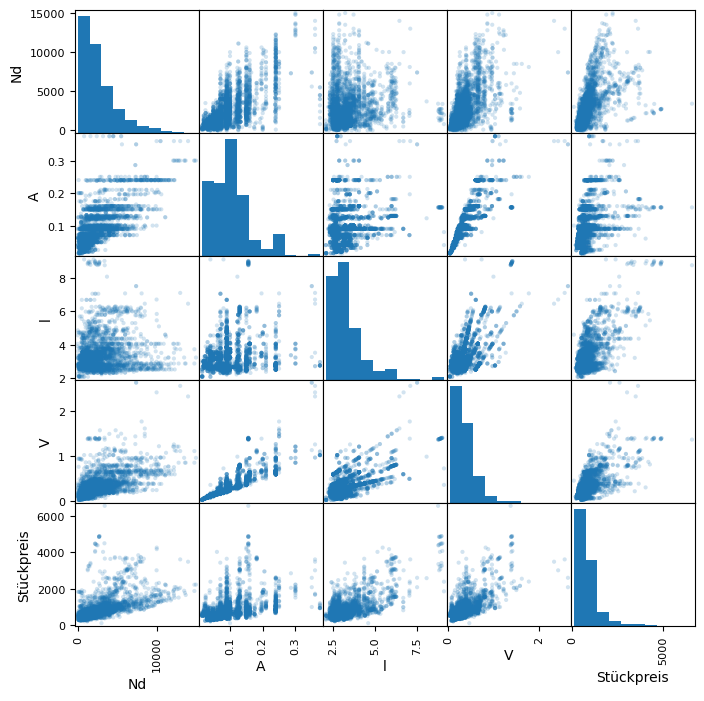

In [10]:
sub_df = df[["Nd", "A", "l", "V", "Stückpreis"]]

from pandas.plotting import scatter_matrix

scatter_matrix(sub_df, alpha=0.2, figsize=(8, 8), diagonal="hist")
# plt.savefig('scatter_matrix_df.png', dpi=300)  # save plot, befor showing
plt.show()

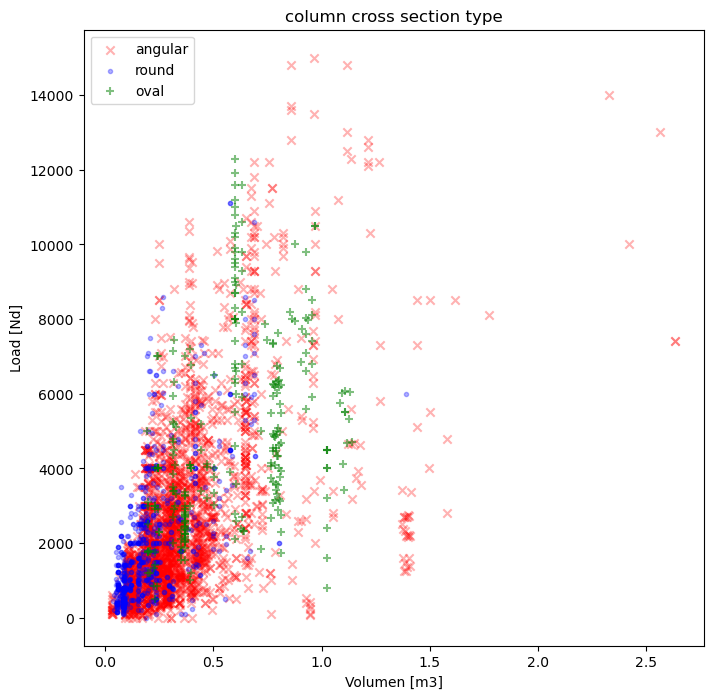

In [11]:
rund = df[df["rund"] == "x"]
eckig = df[df["eckig"] == "x"]
oval = df[df["oval"] == "x"]

plt.figure(figsize=(8, 8))

plt.scatter(eckig["V"], eckig["Nd"], marker="x", alpha=0.3, c="r", label="angular")
plt.scatter(rund["V"], rund["Nd"], marker=".", alpha=0.3, c="b", label="round")
plt.scatter(oval["V"], oval["Nd"], marker="+", alpha=0.5, c="g", label="oval")
plt.title("column cross section type")
plt.xlabel("Volumen [m3]")
plt.ylabel("Load [Nd]")
plt.legend()
# plt.savefig('scatter_cs_tpyes.png', dpi=300)
plt.show()

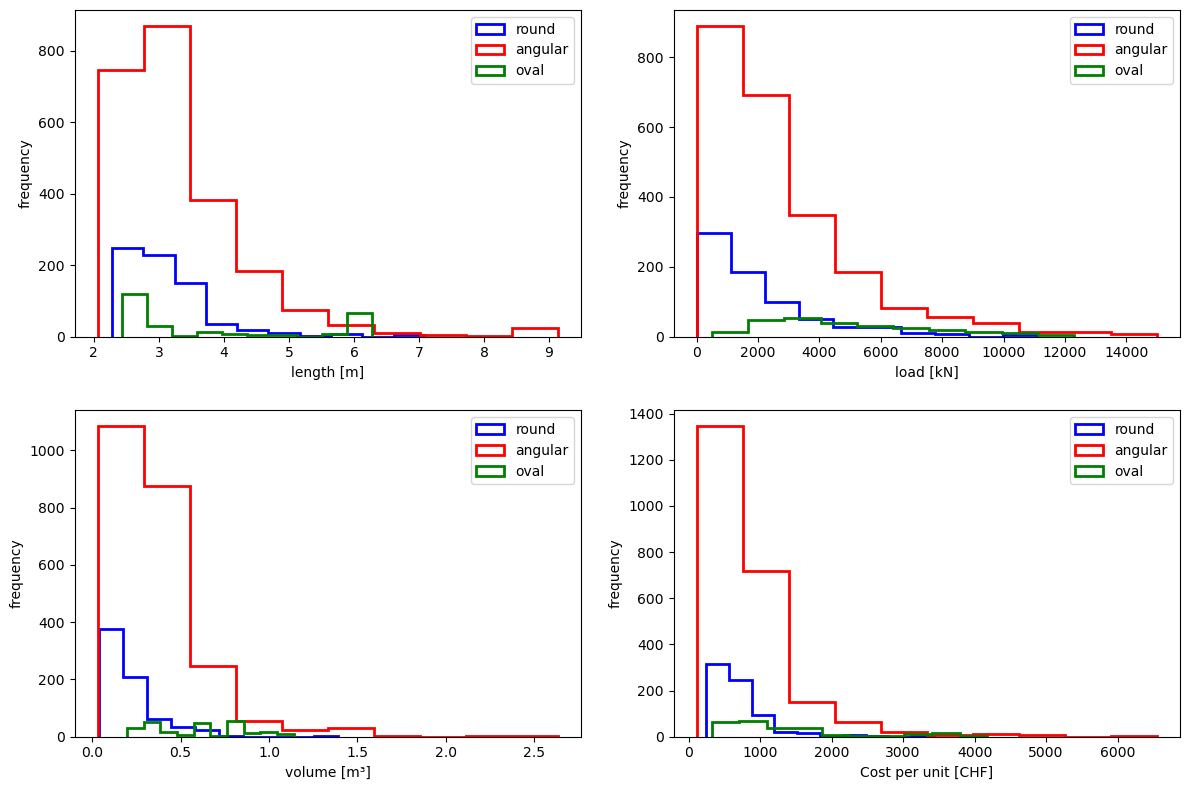

In [12]:

plt.figure(figsize=(12, 8))

plt.subplot(2, 2, 1)
plt.hist(rund["l"], color="b", histtype="step", linewidth=2, label="round")
plt.hist(eckig["l"], color="r", histtype="step", linewidth=2 ,label="angular")
plt.hist(oval["l"], color="g", histtype="step", linewidth=2, label="oval")
plt.xlabel("length [m]")
plt.ylabel("frequency")
plt.legend()

plt.subplot(2, 2, 2)
plt.hist(rund["Nd"], color="b", histtype="step", linewidth=2, label="round")
plt.hist(eckig["Nd"], color="r", histtype="step", linewidth=2 ,label="angular")
plt.hist(oval["Nd"], color="g", histtype="step", linewidth=2, label="oval")
plt.xlabel("load [kN]")
plt.ylabel("frequency")
plt.legend()

plt.subplot(2, 2, 3)
plt.hist(rund["V"], color="b", histtype="step", linewidth=2, label="round")
plt.hist(eckig["V"], color="r", histtype="step", linewidth=2 ,label="angular")
plt.hist(oval["V"], color="g", histtype="step", linewidth=2, label="oval")
plt.xlabel("volume [m³]")
plt.ylabel("frequency")
plt.legend()

plt.subplot(2, 2, 4)
plt.hist(rund["Stückpreis"], color="b", histtype="step", linewidth=2, label="round")
plt.hist(eckig["Stückpreis"], color="r", histtype="step", linewidth=2 ,label="angular")
plt.hist(oval["Stückpreis"], color="g", histtype="step", linewidth=2, label="oval")
plt.xlabel("Cost per unit [CHF]")
plt.ylabel("frequency")
plt.legend()

plt.tight_layout(h_pad=2, w_pad=2)
plt.legend()
# plt.savefig('histograms.png', dpi=300)
plt.show()

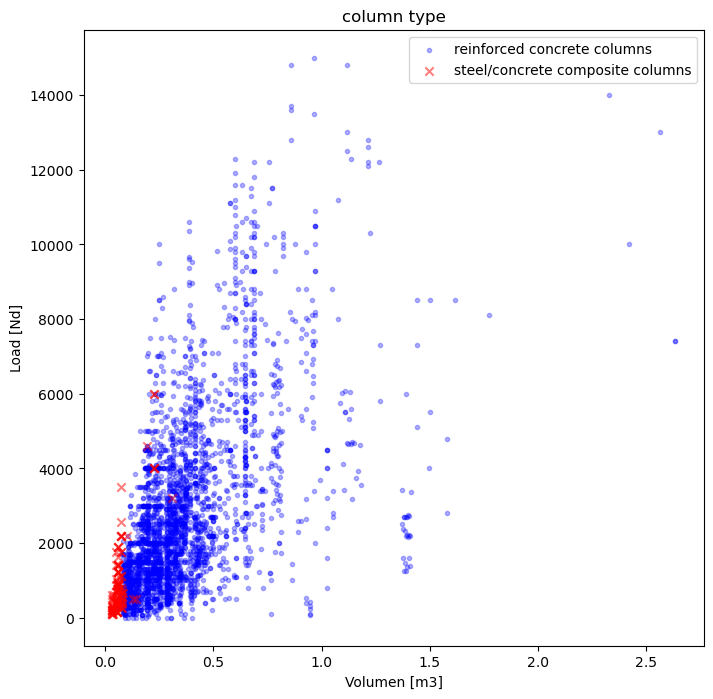

In [13]:
sbv = df[df["Stahlbetonverbundstütze"] == "x"]
sb = df[df["Stahlbetonstütze"] == "x"]


plt.figure(figsize=(8, 8))


plt.scatter(sb["V"], sb["Nd"], marker=".", alpha=0.3, c="b", label="reinforced concrete columns")
plt.scatter(sbv["V"], sbv["Nd"], marker="x", alpha=0.5, c="r", label="steel/concrete composite columns")

plt.title("column type")
plt.xlabel("Volumen [m3]")
plt.ylabel("Load [Nd]")
plt.legend()
# plt.savefig('scatter_column_tpyes.png', dpi=300)
plt.show()

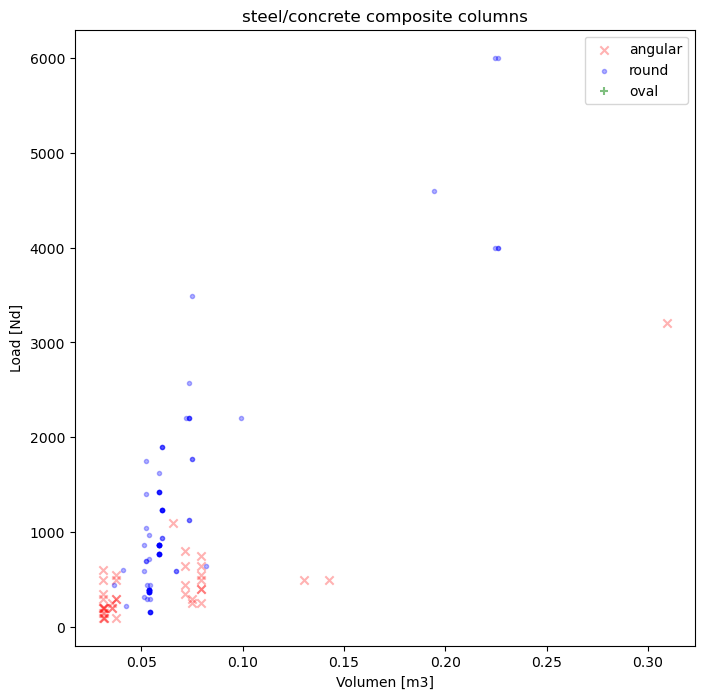

In [14]:
sbv_rund = sbv[sbv["rund"] == "x"]
sbv_eckig = sbv[sbv["eckig"] == "x"]
sbv_oval = sbv[sbv["oval"] == "x"]

plt.figure(figsize=(8, 8))

plt.scatter(sbv_eckig["V"], sbv_eckig["Nd"], marker="x", alpha=0.3, c="r", label="angular")
plt.scatter(sbv_rund["V"], sbv_rund["Nd"], marker=".", alpha=0.3, c="b", label="round")
plt.scatter(sbv_oval["V"], sbv_oval["Nd"], marker="+", alpha=0.5, c="g", label="oval")
plt.title("steel/concrete composite columns")
plt.xlabel("Volumen [m3]")
plt.ylabel("Load [Nd]")
plt.legend()
# plt.savefig('scatter_sbv_cs_tpyes.png', dpi=300)
plt.show()

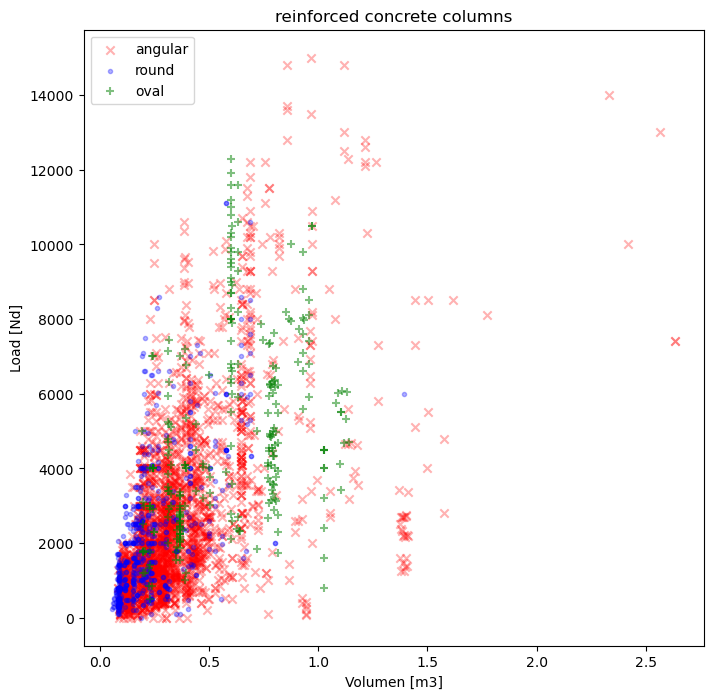

In [15]:
sb_rund = sb[sb["rund"] == "x"]
sb_eckig = sb[sb["eckig"] == "x"]
sb_oval = sb[sb["oval"] == "x"]

plt.figure(figsize=(8, 8))

plt.scatter(sb_eckig["V"], sb_eckig["Nd"], marker="x", alpha=0.3, c="r", label="angular")
plt.scatter(sb_rund["V"], sb_rund["Nd"], marker=".", alpha=0.3, c="b", label="round")
plt.scatter(sb_oval["V"], sb_oval["Nd"], marker="+", alpha=0.5, c="g", label="oval")
plt.title("reinforced concrete columns")
plt.xlabel("Volumen [m3]")
plt.ylabel("Load [Nd]")
plt.legend()
# plt.savefig('scatter_tpyes.png', dpi=300)
plt.show()

# Modelling

## all data, no filtering

### Linear model

In [16]:
x = df[["Nd", "A", "V", "l"]]
y = df[["Stückpreis"]]

In [134]:
x_train, x_test, y_train, y_test = cas.create_test_train_set(x, y)

In [135]:
LM = cas.LinearModel()
LMmodel = LM.linear_model(x_train, y_train)
print("MSE:")
print(f"Train: {LM.mse(x_train, y_train, LMmodel):0.0f}")
print(f"Test: {LM.mse(x_test, y_test, LMmodel):0.0f}")
print("\nR2:")
print(f"Train: {LM.r2(x_train, y_train, LMmodel):0.4f}")
print(f"Test: {LM.r2(x_test, y_test, LMmodel):0.4f}")

# LMmodel.intercept_
# LMmodel.coef_
print(f"\nIntercept: {LMmodel.intercept_[0]:0.4f}")
print(f"Coeficent Nd: {LMmodel.coef_[0][0]:0.4f}")
print(f"Coeficent A: {LMmodel.coef_[0][1]:0.4f}")
print(f"Coeficent V: {LMmodel.coef_[0][2]:0.4f}")
print(f"Coeficent l: {LMmodel.coef_[0][3]:0.4f}")

MSE:
Train: 329
Test: 343

R2:
Train: 0.7041
Test: 0.7202

Intercept: -70.2744
Coeficent Nd: 0.1313
Coeficent A: -5440.8351
Coeficent V: 1548.3899
Coeficent l: 175.4642


### Linear Regression with the statsmodels module

In [136]:
import statsmodels.api as sm


X2 = sm.add_constant(x_train) # make sure that the model has an intercept
# est = sm.OLS(formula="volume ~ diam * height**2", endog=y, exog=x)
est = sm.OLS(y_train, X2) # run OLS
model = est.fit()

model.params # print model parameters

print(model.summary())

                            OLS Regression Results                            
Dep. Variable:             Stückpreis   R-squared:                       0.704
Model:                            OLS   Adj. R-squared:                  0.704
Method:                 Least Squares   F-statistic:                     1605.
Date:                Sun, 20 Nov 2022   Prob (F-statistic):               0.00
Time:                        15:02:10   Log-Likelihood:                -19499.
No. Observations:                2703   AIC:                         3.901e+04
Df Residuals:                    2698   BIC:                         3.904e+04
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        -70.2744     51.818     -1.356      0.1

In [20]:
import seaborn as sns
from statsmodels.graphics.gofplots import ProbPlot
#plt.style.use('seaborn') # pretty matplotlib plots

def graph(formula, x_range, label=None):
    """
    Helper function for plotting cook's distance lines
    """
    x = x_range
    y = formula(x)
    plt.plot(x, y, label=label, lw=1, ls='--', color='red')


def diagnostic_plots(X, y, model_fit=None):
  """
  Function to reproduce the 4 base plots of an OLS model in R.

  ---
  Inputs:

  X: A numpy array or pandas dataframe of the features to use in building the linear regression model

  y: A numpy array or pandas series/dataframe of the target variable of the linear regression model

  model_fit [optional]: a statsmodel.api.OLS model after regressing y on X. If not provided, will be
                        generated from X, y
  """

  if not model_fit:
      model_fit = sm.OLS(y, sm.add_constant(X)).fit()

  # create dataframe from X, y for easier plot handling
  dataframe = pd.concat([X, y], axis=1)

  # model values
  model_fitted_y = model_fit.fittedvalues
  # model residuals
  model_residuals = model_fit.resid
  # normalized residuals
  model_norm_residuals = model_fit.get_influence().resid_studentized_internal
  # absolute squared normalized residuals
  model_norm_residuals_abs_sqrt = np.sqrt(np.abs(model_norm_residuals))
  # absolute residuals
  model_abs_resid = np.abs(model_residuals)
  # leverage, from statsmodels internals
  model_leverage = model_fit.get_influence().hat_matrix_diag
  # cook's distance, from statsmodels internals
  model_cooks = model_fit.get_influence().cooks_distance[0]


  plot_lm_1 = plt.figure()
  plot_lm_1.axes[0] = sns.residplot(model_fitted_y, y, data=dataframe,
                            lowess=True,
                            scatter_kws={'alpha': 0.5},
                            line_kws={'color': 'red', 'lw': 1, 'alpha': 0.8})

  plot_lm_1.axes[0].set_title('Residuals vs Fitted')
  plot_lm_1.axes[0].set_xlabel('Fitted values')
  plot_lm_1.axes[0].set_ylabel('Residuals');

  # annotations
  abs_resid = model_abs_resid.sort_values(ascending=False)
  abs_resid_top_3 = abs_resid[:3]
  for i in abs_resid_top_3.index:
      plot_lm_1.axes[0].annotate(i,
                                 xy=(model_fitted_y[i],
                                     model_residuals[i]));

  QQ = ProbPlot(model_norm_residuals)
  plot_lm_2 = QQ.qqplot(line='45', alpha=0.5, color='#4C72B0', lw=1)
  plot_lm_2.axes[0].set_title('Normal Q-Q')
  plot_lm_2.axes[0].set_xlabel('Theoretical Quantiles')
  plot_lm_2.axes[0].set_ylabel('Standardized Residuals');
  # annotations
  abs_norm_resid = np.flip(np.argsort(np.abs(model_norm_residuals)), 0)
  abs_norm_resid_top_3 = abs_norm_resid[:3]
  for r, i in enumerate(abs_norm_resid_top_3):
      plot_lm_2.axes[0].annotate(i,
                                 xy=(np.flip(QQ.theoretical_quantiles, 0)[r],
                                     model_norm_residuals[i]));

  plot_lm_3 = plt.figure()
  plt.scatter(model_fitted_y, model_norm_residuals_abs_sqrt, alpha=0.5);
  sns.regplot(model_fitted_y, model_norm_residuals_abs_sqrt,
              scatter=False,
              ci=False,
              lowess=True,
              line_kws={'color': 'red', 'lw': 1, 'alpha': 0.8});
  plot_lm_3.axes[0].set_title('Scale-Location')
  plot_lm_3.axes[0].set_xlabel('Fitted values')
  plot_lm_3.axes[0].set_ylabel('$\sqrt{|Standardized Residuals|}$');


  # annotations
  abs_sq_norm_resid = np.flip(np.argsort(model_norm_residuals_abs_sqrt), 0)
  abs_sq_norm_resid_top_3 = abs_sq_norm_resid[:3]
  for i in abs_sq_norm_resid_top_3:
      plot_lm_3.axes[0].annotate(i,
                                 xy=(model_fitted_y.iloc[i],
                                     model_norm_residuals_abs_sqrt[i]));

  plot_lm_4 = plt.figure();
  plt.scatter(model_leverage, model_norm_residuals, alpha=0.5);
  sns.regplot(model_leverage, model_norm_residuals,
              scatter=False,
              ci=False,
              lowess=True,
              line_kws={'color': 'red', 'lw': 1, 'alpha': 0.8});
  plot_lm_4.axes[0].set_xlim(0, max(model_leverage)+0.01)
  plot_lm_4.axes[0].set_ylim(-3, 5)
  plot_lm_4.axes[0].set_title('Residuals vs Leverage')
  plot_lm_4.axes[0].set_xlabel('Leverage')
  plot_lm_4.axes[0].set_ylabel('Standardized Residuals');

  # annotations
  leverage_top_3 = np.flip(np.argsort(model_cooks), 0)[:3]
  for i in leverage_top_3:
      plot_lm_4.axes[0].annotate(i,
                                 xy=(model_leverage[i],
                                     model_norm_residuals[i]));

  p = len(model_fit.params) # number of model parameters
  graph(lambda x: np.sqrt((0.5 * p * (1 - x)) / x),
        np.linspace(0.001, max(model_leverage), 50),
        'Cook\'s distance') # 0.5 line
  graph(lambda x: np.sqrt((1 * p * (1 - x)) / x),
        np.linspace(0.001, max(model_leverage), 50)) # 1 line
  plot_lm_4.legend(loc='upper right');


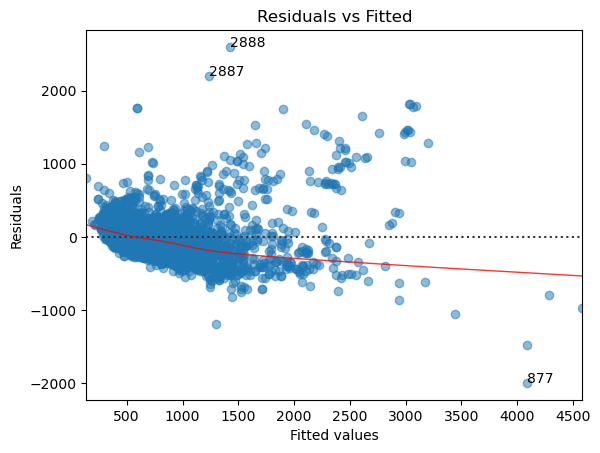

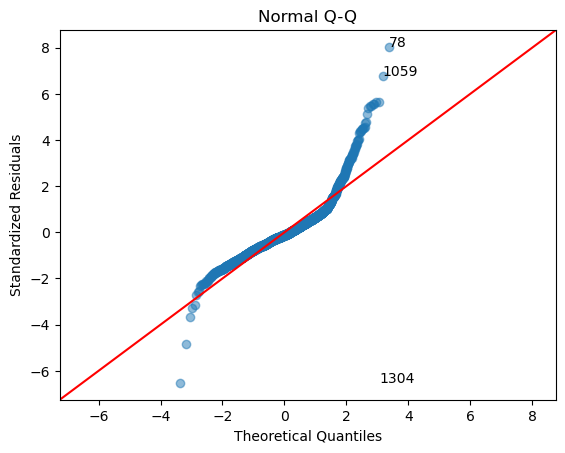

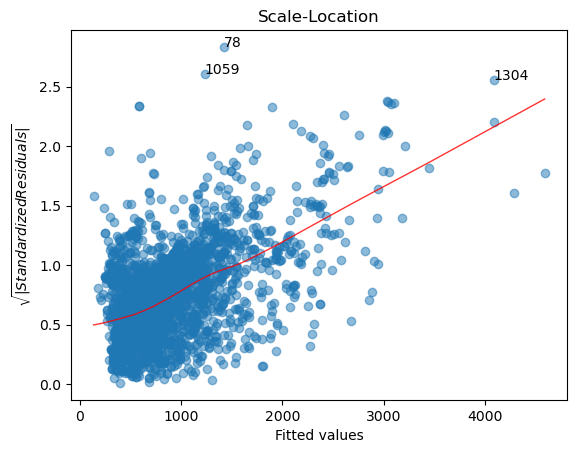

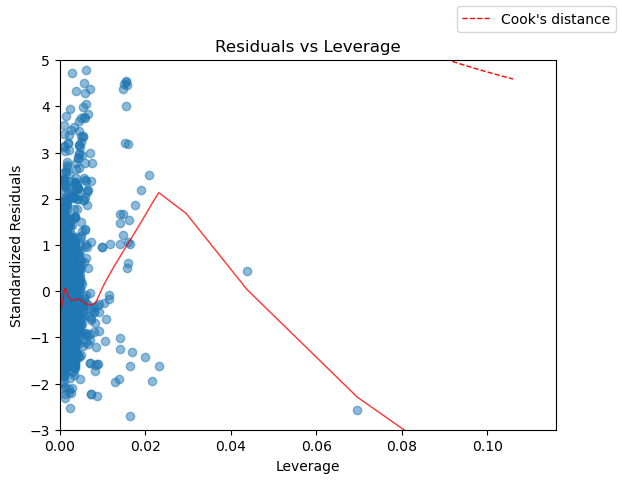

In [21]:
diagnostic_plots(x_train,y_train)

### Neural Network

In [22]:
xnn = x.mul({"Nd": 1/10000, "A": 10, "l": 1/10, "V": 1})
ynn = y.mul({"Stückpreis": 1/10000})

In [23]:
xnn_train, xnn_test, ynn_train, ynn_test = cas.create_test_train_set(xnn, ynn)

In [24]:
NN = cas.NeuralNetwork()
NNmodel = NN.creat_network(4)

2022-11-20 14:12:30.313216: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcuda.so.1'; dlerror: libcuda.so.1: cannot open shared object file: No such file or directory
2022-11-20 14:12:30.313798: W tensorflow/compiler/xla/stream_executor/cuda/cuda_driver.cc:265] failed call to cuInit: UNKNOWN ERROR (303)
2022-11-20 14:12:30.313817: I tensorflow/compiler/xla/stream_executor/cuda/cuda_diagnostics.cc:156] kernel driver does not appear to be running on this host (tweety): /proc/driver/nvidia/version does not exist
2022-11-20 14:12:30.314482: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [25]:
hist = NN.fit_model(NNmodel, xnn_train, ynn_train, xnn_test, ynn_test)

Epoch 1/256
85/85 [==============================] - 1s 4ms/step - loss: 0.0021 - r_square: 0.4391 - val_loss: 0.0010 - val_r_square: 0.7495
Epoch 2/256
85/85 [==============================] - 0s 2ms/step - loss: 0.0013 - r_square: 0.6464 - val_loss: 0.0013 - val_r_square: 0.6719
Epoch 3/256
85/85 [==============================] - 0s 2ms/step - loss: 8.1555e-04 - r_square: 0.7794 - val_loss: 0.0012 - val_r_square: 0.6986
Epoch 4/256
85/85 [==============================] - 0s 2ms/step - loss: 8.5868e-04 - r_square: 0.7677 - val_loss: 0.0010 - val_r_square: 0.7462
Epoch 5/256
85/85 [==============================] - 0s 2ms/step - loss: 8.4844e-04 - r_square: 0.7705 - val_loss: 0.0014 - val_r_square: 0.6412
Epoch 6/256
85/85 [==============================] - 0s 2ms/step - loss: 7.9067e-04 - r_square: 0.7861 - val_loss: 0.0012 - val_r_square: 0.7006
Epoch 7/256
85/85 [==============================] - 0s 2ms/step - loss: 7.4926e-04 - r_square: 0.7973 - val_loss: 9.0975e-04 - val_r_squa

85/85 [==============================] - 0s 2ms/step - loss: 5.4724e-04 - r_square: 0.8519 - val_loss: 0.0011 - val_r_square: 0.7290
Epoch 57/256
85/85 [==============================] - 0s 2ms/step - loss: 7.0878e-04 - r_square: 0.8082 - val_loss: 8.9525e-04 - val_r_square: 0.7777
Epoch 58/256
85/85 [==============================] - 0s 2ms/step - loss: 5.5725e-04 - r_square: 0.8492 - val_loss: 7.3631e-04 - val_r_square: 0.8171
Epoch 59/256
85/85 [==============================] - 0s 2ms/step - loss: 6.2772e-04 - r_square: 0.8302 - val_loss: 6.8052e-04 - val_r_square: 0.8310
Epoch 60/256
85/85 [==============================] - 0s 2ms/step - loss: 6.5713e-04 - r_square: 0.8222 - val_loss: 9.0578e-04 - val_r_square: 0.7750
Epoch 61/256
85/85 [==============================] - 0s 2ms/step - loss: 6.2639e-04 - r_square: 0.8305 - val_loss: 7.5468e-04 - val_r_square: 0.8126
Epoch 62/256
85/85 [==============================] - 0s 2ms/step - loss: 6.3496e-04 - r_square: 0.8282 - val_loss: 6

Epoch 111/256
85/85 [==============================] - 0s 2ms/step - loss: 5.0631e-04 - r_square: 0.8630 - val_loss: 8.4331e-04 - val_r_square: 0.7906
Epoch 112/256
85/85 [==============================] - 0s 2ms/step - loss: 5.8248e-04 - r_square: 0.8424 - val_loss: 7.4115e-04 - val_r_square: 0.8159
Epoch 113/256
85/85 [==============================] - 0s 2ms/step - loss: 4.8950e-04 - r_square: 0.8676 - val_loss: 8.1041e-04 - val_r_square: 0.7987
Epoch 114/256
85/85 [==============================] - 0s 2ms/step - loss: 5.4927e-04 - r_square: 0.8514 - val_loss: 9.9330e-04 - val_r_square: 0.7533
Epoch 115/256
85/85 [==============================] - 0s 2ms/step - loss: 5.8228e-04 - r_square: 0.8425 - val_loss: 8.2389e-04 - val_r_square: 0.7954
Epoch 116/256
85/85 [==============================] - 0s 2ms/step - loss: 5.0961e-04 - r_square: 0.8621 - val_loss: 7.3399e-04 - val_r_square: 0.8177
Epoch 117/256
85/85 [==============================] - 0s 2ms/step - loss: 4.8456e-04 - r_squa

85/85 [==============================] - 0s 2ms/step - loss: 5.0391e-04 - r_square: 0.8637 - val_loss: 6.4031e-04 - val_r_square: 0.8410
Epoch 166/256
85/85 [==============================] - 0s 2ms/step - loss: 5.1557e-04 - r_square: 0.8605 - val_loss: 6.9379e-04 - val_r_square: 0.8277
Epoch 167/256
85/85 [==============================] - 0s 2ms/step - loss: 5.0388e-04 - r_square: 0.8637 - val_loss: 6.3011e-04 - val_r_square: 0.8435
Epoch 168/256
85/85 [==============================] - 0s 2ms/step - loss: 4.8072e-04 - r_square: 0.8699 - val_loss: 6.9611e-04 - val_r_square: 0.8271
Epoch 169/256
85/85 [==============================] - 0s 2ms/step - loss: 5.7351e-04 - r_square: 0.8448 - val_loss: 9.1033e-04 - val_r_square: 0.7739
Epoch 170/256
85/85 [==============================] - 0s 2ms/step - loss: 5.1271e-04 - r_square: 0.8613 - val_loss: 6.7989e-04 - val_r_square: 0.8311
Epoch 171/256
85/85 [==============================] - 0s 2ms/step - loss: 4.9158e-04 - r_square: 0.8670 - v

85/85 [==============================] - 0s 2ms/step - loss: 4.7682e-04 - r_square: 0.8710 - val_loss: 6.8670e-04 - val_r_square: 0.8295
Epoch 220/256
85/85 [==============================] - 0s 2ms/step - loss: 4.6569e-04 - r_square: 0.8740 - val_loss: 6.3722e-04 - val_r_square: 0.8417
Epoch 221/256
85/85 [==============================] - 0s 2ms/step - loss: 4.2061e-04 - r_square: 0.8862 - val_loss: 6.4554e-04 - val_r_square: 0.8397
Epoch 222/256
85/85 [==============================] - 0s 2ms/step - loss: 4.3645e-04 - r_square: 0.8819 - val_loss: 6.4708e-04 - val_r_square: 0.8393
Epoch 223/256
85/85 [==============================] - 0s 2ms/step - loss: 4.5852e-04 - r_square: 0.8759 - val_loss: 6.3605e-04 - val_r_square: 0.8420
Epoch 224/256
85/85 [==============================] - 0s 2ms/step - loss: 4.2672e-04 - r_square: 0.8846 - val_loss: 6.9602e-04 - val_r_square: 0.8271
Epoch 225/256
85/85 [==============================] - 0s 2ms/step - loss: 4.6588e-04 - r_square: 0.8740 - v

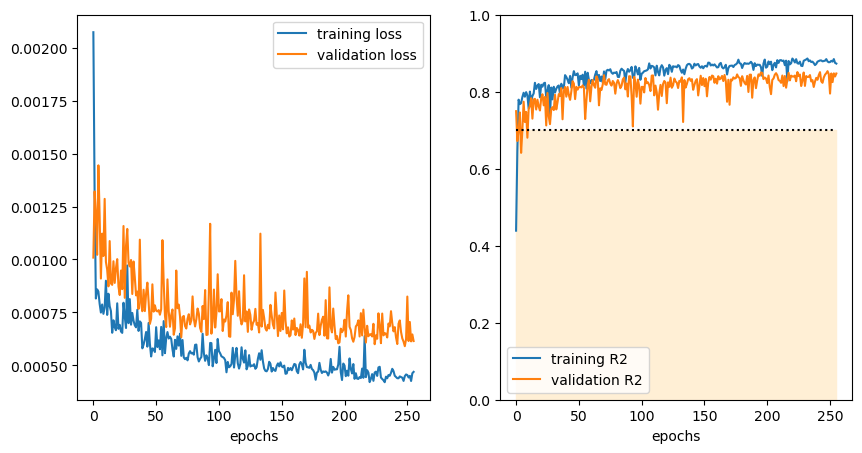

In [26]:
NN.show_learning_plots(hist)

In [27]:
NN.evaluate(xnn_test, ynn_test, NNmodel)

22/22 - 0s - loss: 6.1461e-04 - r_square: 0.8474 - 37ms/epoch - 2ms/step


In [138]:
xin = np.array([[2500/10000, .25*.25*10, .25*.25*3, 3/10]])
print(f"{NN.predict(NNmodel, xin)[0][0]*10000:0.0f}")

1/1 [==============================] - 0s 19ms/step
726


## steel/concrete compound colums

### Linear Regression

In [29]:
sbv[["Nd", "Md", "d", "a", "b", "A", "V", "l", "Stückpreis"]].describe()

,Nd,Md,d,a,b,A,V,l,Stückpreis
count,135.000000,0.0,97.000000,38.000000,38.000000,135.000000,135.000000,135.000000,135.000000
mean,960.962963,NaN,0.169953,0.113684,0.176579,0.022808,0.066607,2.822741,827.490830
std,1051.291937,NaN,0.034736,0.021235,0.036114,0.011529,0.043091,0.395626,484.465781
min,100.000000,NaN,0.133000,0.100000,0.150000,0.013893,0.030975,2.065000,512.343000
25%,370.000000,NaN,0.159000,0.100000,0.150000,0.019856,0.053312,2.685000,568.893000
50%,650.000000,NaN,0.159000,0.100000,0.150000,0.019856,0.058773,2.880000,663.000000
75%,1130.000000,NaN,0.159000,0.120000,0.200000,0.024000,0.069403,2.980000,897.000000
max,6000.000000,NaN,0.300000,0.200000,0.300000,0.070686,0.309300,5.155000,4024.800000


In [30]:
sbvx = sbv[["Nd", "A", "V", "l"]]
sbvy = sbv[["Stückpreis"]]

In [190]:
sbvx_train, sbvx_test, sbvy_train, sbvy_test = cas.create_test_train_set(sbvx, sbvy)

In [191]:
sbvLM = cas.LinearModel()
sbvLMmodel = sbvLM.linear_model(sbvx_train, sbvy_train)
print("MSE:")
print(f"Train: {sbvLM.mse(sbvx_train, sbvy_train, sbvLMmodel):0.0f}")
print(f"Test: {sbvLM.mse(sbvx_test, sbvy_test, sbvLMmodel):0.0f}")
print("\nR2:")
print(f"Train: {sbvLM.r2(sbvx_train, sbvy_train, sbvLMmodel):0.4f}")
print(f"Test: {sbvLM.r2(sbvx_test, sbvy_test, sbvLMmodel):0.4f}")

MSE:
Train: 232
Test: 309

R2:
Train: 0.8023
Test: -0.2145


### Neural Network

In [192]:
sbvxnn = sbvx.mul({"Nd": 1/10000, "A": 10, "l": 1/10, "V": 1})
sbvynn = sbvy.mul({"Stückpreis": 1/10000})

In [230]:
sbvxnn_train, sbvxnn_test, sbvynn_train, sbvynn_test = cas.create_test_train_set(sbvxnn, sbvynn)

In [231]:
sbvNN = cas.NeuralNetwork()
sbvNNmodel = sbvNN.creat_network(4)

In [232]:
sbvhist = sbvNN.fit_model(sbvNNmodel, sbvxnn_train, sbvynn_train, sbvxnn_test, sbvynn_test)

Epoch 1/256
4/4 [==============================] - 0s 56ms/step - loss: 0.0076 - r_square: -2.0939 - val_loss: 0.0014 - val_r_square: 0.2537
Epoch 2/256
4/4 [==============================] - 0s 14ms/step - loss: 0.0025 - r_square: -0.0231 - val_loss: 0.0021 - val_r_square: -0.1422
Epoch 3/256
4/4 [==============================] - 0s 15ms/step - loss: 0.0020 - r_square: 0.1838 - val_loss: 0.0010 - val_r_square: 0.4604
Epoch 4/256
4/4 [==============================] - 0s 15ms/step - loss: 0.0013 - r_square: 0.4790 - val_loss: 0.0015 - val_r_square: 0.1979
Epoch 5/256
4/4 [==============================] - 0s 17ms/step - loss: 0.0018 - r_square: 0.2689 - val_loss: 5.4467e-04 - val_r_square: 0.7084
Epoch 6/256
4/4 [==============================] - 0s 16ms/step - loss: 0.0014 - r_square: 0.4362 - val_loss: 6.4979e-04 - val_r_square: 0.6521
Epoch 7/256
4/4 [==============================] - 0s 15ms/step - loss: 0.0014 - r_square: 0.4172 - val_loss: 4.9886e-04 - val_r_square: 0.7329
Epoch

4/4 [==============================] - 0s 14ms/step - loss: 3.9637e-04 - r_square: 0.8379 - val_loss: 5.0998e-04 - val_r_square: 0.7269
Epoch 57/256
4/4 [==============================] - 0s 14ms/step - loss: 5.1413e-04 - r_square: 0.7897 - val_loss: 8.7988e-04 - val_r_square: 0.5289
Epoch 58/256
4/4 [==============================] - 0s 14ms/step - loss: 4.9304e-04 - r_square: 0.7984 - val_loss: 7.2440e-04 - val_r_square: 0.6121
Epoch 59/256
4/4 [==============================] - 0s 13ms/step - loss: 4.6462e-04 - r_square: 0.8100 - val_loss: 7.3333e-04 - val_r_square: 0.6073
Epoch 60/256
4/4 [==============================] - 0s 14ms/step - loss: 4.5269e-04 - r_square: 0.8149 - val_loss: 7.0638e-04 - val_r_square: 0.6218
Epoch 61/256
4/4 [==============================] - 0s 14ms/step - loss: 3.9796e-04 - r_square: 0.8372 - val_loss: 7.2966e-04 - val_r_square: 0.6093
Epoch 62/256
4/4 [==============================] - 0s 14ms/step - loss: 3.8035e-04 - r_square: 0.8445 - val_loss: 8.33

4/4 [==============================] - 0s 18ms/step - loss: 3.2705e-04 - r_square: 0.8662 - val_loss: 0.0010 - val_r_square: 0.4623
Epoch 112/256
4/4 [==============================] - 0s 14ms/step - loss: 5.7477e-04 - r_square: 0.7649 - val_loss: 0.0010 - val_r_square: 0.4527
Epoch 113/256
4/4 [==============================] - 0s 15ms/step - loss: 3.9955e-04 - r_square: 0.8366 - val_loss: 6.7400e-04 - val_r_square: 0.6391
Epoch 114/256
4/4 [==============================] - 0s 15ms/step - loss: 7.2868e-04 - r_square: 0.7020 - val_loss: 8.0699e-04 - val_r_square: 0.5679
Epoch 115/256
4/4 [==============================] - 0s 14ms/step - loss: 4.4764e-04 - r_square: 0.8169 - val_loss: 9.5682e-04 - val_r_square: 0.4877
Epoch 116/256
4/4 [==============================] - 0s 15ms/step - loss: 4.9030e-04 - r_square: 0.7995 - val_loss: 9.9387e-04 - val_r_square: 0.4678
Epoch 117/256
4/4 [==============================] - 0s 13ms/step - loss: 4.8225e-04 - r_square: 0.8028 - val_loss: 6.9624

Epoch 166/256
4/4 [==============================] - 0s 14ms/step - loss: 3.2275e-04 - r_square: 0.8680 - val_loss: 9.8191e-04 - val_r_square: 0.4742
Epoch 167/256
4/4 [==============================] - 0s 15ms/step - loss: 3.0221e-04 - r_square: 0.8764 - val_loss: 8.9401e-04 - val_r_square: 0.5213
Epoch 168/256
4/4 [==============================] - 0s 14ms/step - loss: 2.9420e-04 - r_square: 0.8797 - val_loss: 6.8166e-04 - val_r_square: 0.6350
Epoch 169/256
4/4 [==============================] - 0s 14ms/step - loss: 3.6313e-04 - r_square: 0.8515 - val_loss: 8.9589e-04 - val_r_square: 0.5203
Epoch 170/256
4/4 [==============================] - 0s 14ms/step - loss: 3.4374e-04 - r_square: 0.8594 - val_loss: 9.1096e-04 - val_r_square: 0.5122
Epoch 171/256
4/4 [==============================] - 0s 14ms/step - loss: 4.3662e-04 - r_square: 0.8214 - val_loss: 9.6342e-04 - val_r_square: 0.4841
Epoch 172/256
4/4 [==============================] - 0s 15ms/step - loss: 3.7128e-04 - r_square: 0.8

Epoch 221/256
4/4 [==============================] - 0s 14ms/step - loss: 3.2166e-04 - r_square: 0.8685 - val_loss: 9.3628e-04 - val_r_square: 0.4987
Epoch 222/256
4/4 [==============================] - 0s 14ms/step - loss: 2.8024e-04 - r_square: 0.8854 - val_loss: 9.1601e-04 - val_r_square: 0.5095
Epoch 223/256
4/4 [==============================] - 0s 14ms/step - loss: 2.9445e-04 - r_square: 0.8796 - val_loss: 9.4276e-04 - val_r_square: 0.4952
Epoch 224/256
4/4 [==============================] - 0s 14ms/step - loss: 2.8237e-04 - r_square: 0.8845 - val_loss: 9.4807e-04 - val_r_square: 0.4924
Epoch 225/256
4/4 [==============================] - 0s 13ms/step - loss: 3.3951e-04 - r_square: 0.8612 - val_loss: 9.5315e-04 - val_r_square: 0.4896
Epoch 226/256
4/4 [==============================] - 0s 15ms/step - loss: 2.5235e-04 - r_square: 0.8968 - val_loss: 9.2975e-04 - val_r_square: 0.5022
Epoch 227/256
4/4 [==============================] - 0s 14ms/step - loss: 3.2465e-04 - r_square: 0.8

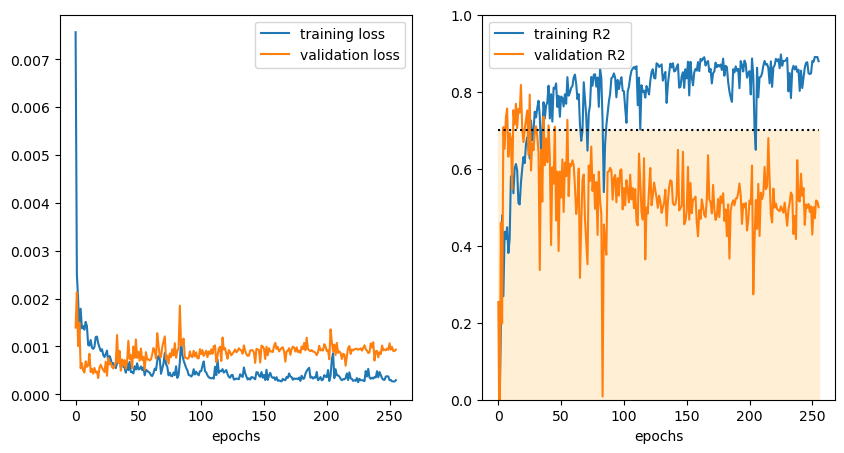

In [233]:
sbvNN.show_learning_plots(sbvhist)

In [234]:
sbvNN.evaluate(sbvxnn_test, sbvynn_test, sbvNNmodel)

1/1 - 0s - loss: 9.3401e-04 - r_square: 0.4999 - 18ms/epoch - 18ms/step


In [187]:
xin = np.array([[2500/10000, .25*.25*10, .25*.25*3, 3/10]])
sbvNN.predict(NNmodel, xin)[0][0]*10000

1/1 [==============================] - 0s 15ms/step


726.2302935123444

## reinforced concret columns

### Linear Regression

In [40]:
sb[["Nd", "Md", "d", "a", "b", "A", "V", "l", "Stückpreis"]].describe()

,Nd,Md,d,a,b,A,V,l,Stückpreis
count,3243.000000,69.000000,607.000000,2539.000000,2539.000000,3243.000000,3243.000000,3243.000000,3243.000000
mean,2831.938329,8.007246,0.281323,0.278633,0.395482,0.104364,0.359838,3.358403,866.763535
std,2384.472427,15.188640,0.075893,0.066329,0.150576,0.058148,0.255103,1.012288,618.293080
min,1.000000,1.000000,0.159000,0.180000,0.180000,0.019856,0.055000,2.060000,111.891000
25%,1100.000000,1.000000,0.200000,0.220000,0.300000,0.070686,0.197213,2.685000,498.219085
50%,2160.000000,1.000000,0.300000,0.300000,0.350000,0.090000,0.300437,3.150000,704.600000
75%,3852.000000,1.000000,0.300000,0.300000,0.500000,0.129600,0.432900,3.585000,986.619000
max,15000.000000,50.000000,0.500000,0.600000,1.000000,0.375000,2.635500,9.140000,6551.896000


In [41]:
sbx = sb[["Nd", "A", "V", "l"]]
sby = sb[["Stückpreis"]]

In [243]:
sbx_train, sbx_test, sby_train, sby_test = cas.create_test_train_set(sbx, sby)

In [244]:
sbLM = cas.LinearModel()
sbLMmodel = sbLM.linear_model(sbx_train, sby_train)
print("MSE:")
print(f"Train: {sbLM.mse(sbx_train, sby_train, sbLMmodel):0.0f}")
print(f"Test: {sbLM.mse(sbx_test, sby_test, sbLMmodel):0.0f}")
print("\nR2:")
print(f"Train: {sbLM.r2(sbx_train, sby_train, sbLMmodel):0.4f}")
print(f"Test: {sbLM.r2(sbx_test, sby_test, sbLMmodel):0.4f}")

MSE:
Train: 323
Test: 327

R2:
Train: 0.7217
Test: 0.7367


### Neural Network

In [44]:
sbxnn = sbx.mul({"Nd": 1/10000, "A": 10, "l": 1/10, "V": 1})
sbynn = sby.mul({"Stückpreis": 1/10000})

In [245]:
sbxnn_train, sbxnn_test, sbynn_train, sbynn_test = cas.create_test_train_set(sbxnn, sbynn)

In [246]:
sbNN = cas.NeuralNetwork()
sbNNmodel = sbNN.creat_network(4)

In [247]:
sbhist = sbNN.fit_model(sbNNmodel, sbxnn_train, sbynn_train, sbxnn_test, sbynn_test)

Epoch 1/256
82/82 [==============================] - 1s 3ms/step - loss: 0.0027 - r_square: 0.2840 - val_loss: 8.5092e-04 - val_r_square: 0.7959
Epoch 2/256
82/82 [==============================] - 0s 2ms/step - loss: 8.3752e-04 - r_square: 0.7757 - val_loss: 0.0010 - val_r_square: 0.7484
Epoch 3/256
82/82 [==============================] - 0s 2ms/step - loss: 8.5957e-04 - r_square: 0.7698 - val_loss: 0.0016 - val_r_square: 0.6211
Epoch 4/256
82/82 [==============================] - 0s 2ms/step - loss: 8.8579e-04 - r_square: 0.7628 - val_loss: 9.5181e-04 - val_r_square: 0.7717
Epoch 5/256
82/82 [==============================] - 0s 2ms/step - loss: 8.2592e-04 - r_square: 0.7789 - val_loss: 0.0010 - val_r_square: 0.7532
Epoch 6/256
82/82 [==============================] - 0s 2ms/step - loss: 8.4189e-04 - r_square: 0.7746 - val_loss: 0.0020 - val_r_square: 0.5204
Epoch 7/256
82/82 [==============================] - 0s 2ms/step - loss: 8.6366e-04 - r_square: 0.7687 - val_loss: 7.7089e-04 

Epoch 56/256
82/82 [==============================] - 0s 2ms/step - loss: 5.8963e-04 - r_square: 0.8421 - val_loss: 0.0012 - val_r_square: 0.7182
Epoch 57/256
82/82 [==============================] - 0s 2ms/step - loss: 6.1422e-04 - r_square: 0.8355 - val_loss: 6.7366e-04 - val_r_square: 0.8384
Epoch 58/256
82/82 [==============================] - 0s 1ms/step - loss: 6.3930e-04 - r_square: 0.8288 - val_loss: 8.6008e-04 - val_r_square: 0.7937
Epoch 59/256
82/82 [==============================] - 0s 2ms/step - loss: 6.6587e-04 - r_square: 0.8217 - val_loss: 5.5826e-04 - val_r_square: 0.8661
Epoch 60/256
82/82 [==============================] - 0s 1ms/step - loss: 5.6523e-04 - r_square: 0.8487 - val_loss: 5.8275e-04 - val_r_square: 0.8602
Epoch 61/256
82/82 [==============================] - 0s 1ms/step - loss: 5.4047e-04 - r_square: 0.8553 - val_loss: 6.0607e-04 - val_r_square: 0.8546
Epoch 62/256
82/82 [==============================] - 0s 2ms/step - loss: 6.7712e-04 - r_square: 0.8187 

82/82 [==============================] - 0s 1ms/step - loss: 5.0214e-04 - r_square: 0.8655 - val_loss: 6.5257e-04 - val_r_square: 0.8435
Epoch 111/256
82/82 [==============================] - 0s 2ms/step - loss: 4.8593e-04 - r_square: 0.8699 - val_loss: 5.3853e-04 - val_r_square: 0.8708
Epoch 112/256
82/82 [==============================] - 0s 2ms/step - loss: 4.5359e-04 - r_square: 0.8785 - val_loss: 5.2212e-04 - val_r_square: 0.8748
Epoch 113/256
82/82 [==============================] - 0s 1ms/step - loss: 4.7396e-04 - r_square: 0.8731 - val_loss: 5.3188e-04 - val_r_square: 0.8724
Epoch 114/256
82/82 [==============================] - 0s 2ms/step - loss: 4.9931e-04 - r_square: 0.8663 - val_loss: 5.8340e-04 - val_r_square: 0.8601
Epoch 115/256
82/82 [==============================] - 0s 2ms/step - loss: 5.1513e-04 - r_square: 0.8621 - val_loss: 7.5402e-04 - val_r_square: 0.8192
Epoch 116/256
82/82 [==============================] - 0s 2ms/step - loss: 4.9915e-04 - r_square: 0.8663 - v

82/82 [==============================] - 0s 2ms/step - loss: 4.6604e-04 - r_square: 0.8752 - val_loss: 4.5997e-04 - val_r_square: 0.8897
Epoch 165/256
82/82 [==============================] - 0s 1ms/step - loss: 5.1102e-04 - r_square: 0.8632 - val_loss: 6.0906e-04 - val_r_square: 0.8539
Epoch 166/256
82/82 [==============================] - 0s 1ms/step - loss: 4.8618e-04 - r_square: 0.8698 - val_loss: 5.0566e-04 - val_r_square: 0.8787
Epoch 167/256
82/82 [==============================] - 0s 1ms/step - loss: 4.8493e-04 - r_square: 0.8702 - val_loss: 6.9562e-04 - val_r_square: 0.8332
Epoch 168/256
82/82 [==============================] - 0s 2ms/step - loss: 5.0992e-04 - r_square: 0.8635 - val_loss: 5.8233e-04 - val_r_square: 0.8603
Epoch 169/256
82/82 [==============================] - 0s 1ms/step - loss: 4.3949e-04 - r_square: 0.8823 - val_loss: 5.6244e-04 - val_r_square: 0.8651
Epoch 170/256
82/82 [==============================] - 0s 2ms/step - loss: 6.0004e-04 - r_square: 0.8393 - v

82/82 [==============================] - 0s 2ms/step - loss: 4.5952e-04 - r_square: 0.8770 - val_loss: 5.4649e-04 - val_r_square: 0.8689
Epoch 219/256
82/82 [==============================] - 0s 2ms/step - loss: 4.7518e-04 - r_square: 0.8728 - val_loss: 5.6553e-04 - val_r_square: 0.8644
Epoch 220/256
82/82 [==============================] - 0s 2ms/step - loss: 4.7564e-04 - r_square: 0.8726 - val_loss: 5.9163e-04 - val_r_square: 0.8581
Epoch 221/256
82/82 [==============================] - 0s 2ms/step - loss: 4.7143e-04 - r_square: 0.8738 - val_loss: 6.8009e-04 - val_r_square: 0.8369
Epoch 222/256
82/82 [==============================] - 0s 2ms/step - loss: 4.9391e-04 - r_square: 0.8677 - val_loss: 6.5931e-04 - val_r_square: 0.8419
Epoch 223/256
82/82 [==============================] - 0s 2ms/step - loss: 4.5956e-04 - r_square: 0.8769 - val_loss: 6.2003e-04 - val_r_square: 0.8513
Epoch 224/256
82/82 [==============================] - 0s 2ms/step - loss: 4.7619e-04 - r_square: 0.8725 - v

In [248]:
sbNN.evaluate(sbxnn_test, sbynn_test, sbNNmodel)

21/21 - 0s - loss: 5.9896e-04 - r_square: 0.8563 - 33ms/epoch - 2ms/step


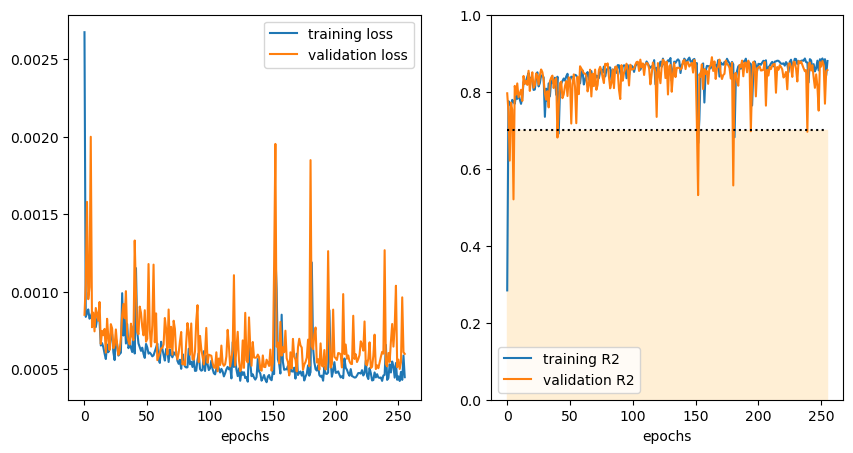

In [249]:
sbNN.show_learning_plots(sbhist)

## reinforced concret columns, round

### Linear Regression

In [50]:
sb_rund[["Nd", "Md", "d", "a", "b", "A", "V", "l", "Stückpreis"]].describe()

,Nd,Md,d,a,b,A,V,l,Stückpreis
count,607.000000,5.000000,607.000000,0.0,0.0,607.000000,607.000000,607.000000,607.000000
mean,2122.448105,23.500000,0.281323,NaN,NaN,0.066675,0.223642,3.200247,680.055281
std,1856.476260,9.287088,0.075893,NaN,NaN,0.038008,0.159979,0.713771,368.812978
min,1.000000,17.500000,0.159000,NaN,NaN,0.019856,0.055000,2.279000,241.098000
25%,800.000000,20.000000,0.200000,NaN,NaN,0.031416,0.098960,2.740000,426.836620
50%,1500.000000,20.000000,0.300000,NaN,NaN,0.070686,0.174260,3.140000,570.644100
75%,2770.000000,20.000000,0.300000,NaN,NaN,0.070686,0.267192,3.390000,836.336449
max,11100.000000,40.000000,0.500000,NaN,NaN,0.196350,1.392118,7.090000,2730.026000


In [51]:
sb_rundx = sb_rund[["Nd", "A", "V", "l"]]
sb_rundy = sb_rund[["Stückpreis"]]

In [52]:
sb_rundx_train, sb_rundx_test, sb_rundy_train, sb_rundy_test = cas.create_test_train_set(sb_rundx, sb_rundy)

In [53]:
sb_rundLM = cas.LinearModel()
sb_rundLMmodel = sb_rundLM.linear_model(sb_rundx_train, sb_rundy_train)
print("MSE:")
print(f"{sb_rundLM.mse(sb_rundx_train, sb_rundy_train, sb_rundLMmodel):0.0f}")
print(f"{sb_rundLM.mse(sb_rundx_test, sb_rundy_test, sb_rundLMmodel):0.0f}")
print("\nR2:")
print(f"{sb_rundLM.r2(sb_rundx_train, sb_rundy_train, sb_rundLMmodel):0.4f}")
print(f"{sb_rundLM.r2(sb_rundx_test, sb_rundy_test, sb_rundLMmodel):0.4f}")

MSE:
198
169

R2:
0.7244
0.7432


### Neural Network

In [54]:
sb_rundxnn = sb_rundx.mul({"Nd": 1/10000, "A": 10, "l": 1/10, "V": 1})
sb_rundynn = sb_rundy.mul({"Stückpreis": 1/10000})

In [55]:
sb_rundxnn_train, sb_rundxnn_test, sb_rundynn_train, sb_rundynn_test = cas.create_test_train_set(sb_rundxnn, sb_rundynn)

In [56]:
sb_rundNN = cas.NeuralNetwork()
sb_rundNNmodel = sb_rundNN.creat_network(4)

In [57]:
sb_rundhist = sb_rundNN.fit_model(sb_rundNNmodel, sb_rundxnn_train, sb_rundynn_train, sb_rundxnn_test, sb_rundynn_test)

Epoch 1/256
16/16 [==============================] - 1s 13ms/step - loss: 0.0035 - r_square: -1.5798 - val_loss: 0.0017 - val_r_square: -0.2914
Epoch 2/256
16/16 [==============================] - 0s 4ms/step - loss: 9.1808e-04 - r_square: 0.3267 - val_loss: 4.6210e-04 - val_r_square: 0.6539
Epoch 3/256
16/16 [==============================] - 0s 4ms/step - loss: 5.0474e-04 - r_square: 0.6299 - val_loss: 3.6844e-04 - val_r_square: 0.7240
Epoch 4/256
16/16 [==============================] - 0s 5ms/step - loss: 3.8472e-04 - r_square: 0.7179 - val_loss: 3.8024e-04 - val_r_square: 0.7152
Epoch 5/256
16/16 [==============================] - 0s 5ms/step - loss: 3.9115e-04 - r_square: 0.7132 - val_loss: 2.8640e-04 - val_r_square: 0.7855
Epoch 6/256
16/16 [==============================] - 0s 4ms/step - loss: 4.5049e-04 - r_square: 0.6696 - val_loss: 5.6051e-04 - val_r_square: 0.5802
Epoch 7/256
16/16 [==============================] - 0s 4ms/step - loss: 5.0595e-04 - r_square: 0.6290 - val_lo

Epoch 56/256
16/16 [==============================] - 0s 4ms/step - loss: 2.7273e-04 - r_square: 0.8000 - val_loss: 2.4109e-04 - val_r_square: 0.8194
Epoch 57/256
16/16 [==============================] - 0s 4ms/step - loss: 2.6558e-04 - r_square: 0.8052 - val_loss: 2.7274e-04 - val_r_square: 0.7957
Epoch 58/256
16/16 [==============================] - 0s 4ms/step - loss: 2.7414e-04 - r_square: 0.7990 - val_loss: 2.9835e-04 - val_r_square: 0.7765
Epoch 59/256
16/16 [==============================] - 0s 4ms/step - loss: 2.9719e-04 - r_square: 0.7821 - val_loss: 3.1416e-04 - val_r_square: 0.7647
Epoch 60/256
16/16 [==============================] - 0s 4ms/step - loss: 2.8057e-04 - r_square: 0.7942 - val_loss: 1.9946e-04 - val_r_square: 0.8506
Epoch 61/256
16/16 [==============================] - 0s 4ms/step - loss: 2.7142e-04 - r_square: 0.8010 - val_loss: 2.7615e-04 - val_r_square: 0.7932
Epoch 62/256
16/16 [==============================] - 0s 5ms/step - loss: 2.8806e-04 - r_square: 0.7

16/16 [==============================] - 0s 4ms/step - loss: 2.9352e-04 - r_square: 0.7847 - val_loss: 2.8820e-04 - val_r_square: 0.7841
Epoch 111/256
16/16 [==============================] - 0s 4ms/step - loss: 4.0567e-04 - r_square: 0.7025 - val_loss: 2.7017e-04 - val_r_square: 0.7976
Epoch 112/256
16/16 [==============================] - 0s 4ms/step - loss: 2.9531e-04 - r_square: 0.7834 - val_loss: 2.6720e-04 - val_r_square: 0.7999
Epoch 113/256
16/16 [==============================] - 0s 4ms/step - loss: 2.9486e-04 - r_square: 0.7838 - val_loss: 2.4000e-04 - val_r_square: 0.8202
Epoch 114/256
16/16 [==============================] - 0s 4ms/step - loss: 3.5617e-04 - r_square: 0.7388 - val_loss: 2.8515e-04 - val_r_square: 0.7864
Epoch 115/256
16/16 [==============================] - 0s 4ms/step - loss: 2.9219e-04 - r_square: 0.7857 - val_loss: 2.4039e-04 - val_r_square: 0.8199
Epoch 116/256
16/16 [==============================] - 0s 4ms/step - loss: 2.7454e-04 - r_square: 0.7987 - v

16/16 [==============================] - 0s 4ms/step - loss: 2.6552e-04 - r_square: 0.8053 - val_loss: 2.7764e-04 - val_r_square: 0.7920
Epoch 165/256
16/16 [==============================] - 0s 5ms/step - loss: 2.5186e-04 - r_square: 0.8153 - val_loss: 2.6079e-04 - val_r_square: 0.8047
Epoch 166/256
16/16 [==============================] - 0s 4ms/step - loss: 2.7318e-04 - r_square: 0.7997 - val_loss: 2.6832e-04 - val_r_square: 0.7990
Epoch 167/256
16/16 [==============================] - 0s 4ms/step - loss: 2.6353e-04 - r_square: 0.8067 - val_loss: 2.3843e-04 - val_r_square: 0.8214
Epoch 168/256
16/16 [==============================] - 0s 4ms/step - loss: 2.6681e-04 - r_square: 0.8043 - val_loss: 2.5828e-04 - val_r_square: 0.8065
Epoch 169/256
16/16 [==============================] - 0s 4ms/step - loss: 2.6772e-04 - r_square: 0.8037 - val_loss: 3.1096e-04 - val_r_square: 0.7671
Epoch 170/256
16/16 [==============================] - 0s 4ms/step - loss: 2.5541e-04 - r_square: 0.8127 - v

16/16 [==============================] - 0s 4ms/step - loss: 2.6719e-04 - r_square: 0.8041 - val_loss: 3.0764e-04 - val_r_square: 0.7696
Epoch 219/256
16/16 [==============================] - 0s 4ms/step - loss: 2.9118e-04 - r_square: 0.7865 - val_loss: 2.7240e-04 - val_r_square: 0.7960
Epoch 220/256
16/16 [==============================] - 0s 4ms/step - loss: 2.7327e-04 - r_square: 0.7996 - val_loss: 2.6338e-04 - val_r_square: 0.8027
Epoch 221/256
16/16 [==============================] - 0s 4ms/step - loss: 2.6356e-04 - r_square: 0.8067 - val_loss: 2.8559e-04 - val_r_square: 0.7861
Epoch 222/256
16/16 [==============================] - 0s 5ms/step - loss: 2.5848e-04 - r_square: 0.8104 - val_loss: 3.1378e-04 - val_r_square: 0.7650
Epoch 223/256
16/16 [==============================] - 0s 4ms/step - loss: 2.8249e-04 - r_square: 0.7928 - val_loss: 2.6609e-04 - val_r_square: 0.8007
Epoch 224/256
16/16 [==============================] - 0s 4ms/step - loss: 2.4350e-04 - r_square: 0.8214 - v

In [58]:
sb_rundNN.evaluate(sb_rundxnn_test, sb_rundynn_test, sb_rundNNmodel)

4/4 - 0s - loss: 3.2560e-04 - r_square: 0.7561 - 24ms/epoch - 6ms/step


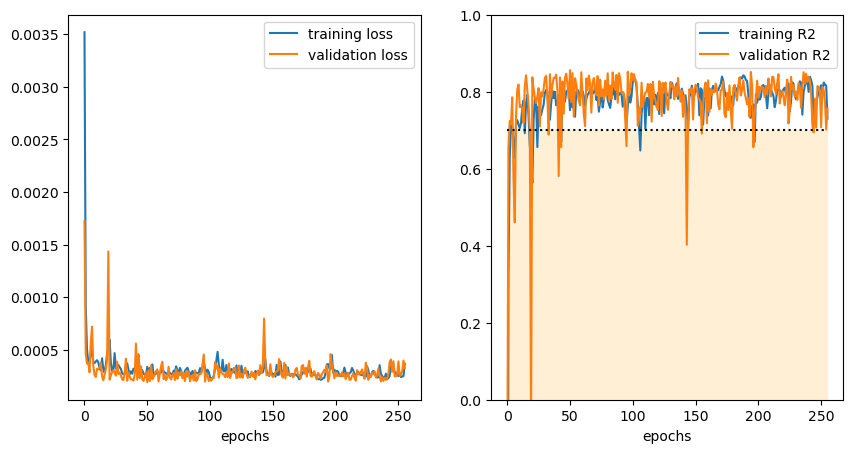

In [59]:
sb_rundNN.show_learning_plots(sb_rundhist)

## reinforced concret columns, angular

### Linear Regression

In [60]:
sb_eckig[["Nd", "Md", "d", "a", "b", "A", "V", "l", "Stückpreis"]].describe()

,Nd,Md,d,a,b,A,V,l,Stückpreis
count,2287.000000,9.000000,0.0,2287.000000,2287.000000,2287.000000,2287.000000,2287.000000,2287.000000
mean,2775.988631,42.222222,NaN,0.277927,0.377420,0.107961,0.369798,3.342815,858.808635
std,2387.911209,10.639288,NaN,0.067124,0.139392,0.055696,0.258234,1.009334,610.598967
min,1.000000,20.000000,NaN,0.180000,0.180000,0.032400,0.082400,2.060000,111.891000
25%,1100.000000,40.000000,NaN,0.220000,0.300000,0.075600,0.207000,2.660000,501.280000
50%,2090.000000,45.000000,NaN,0.300000,0.300000,0.090000,0.300600,3.110000,701.820000
75%,3700.000000,50.000000,NaN,0.300000,0.500000,0.134400,0.436500,3.580000,971.488958
max,15000.000000,50.000000,NaN,0.600000,1.000000,0.360000,2.635500,9.140000,6551.896000


In [61]:
sb_eckigx = sb_eckig[["Nd", "A", "V", "l"]]
sb_eckigy = sb_eckig[["Stückpreis"]]

In [254]:
sb_eckigx_train, sb_eckigx_test, sb_eckigy_train, sb_eckigy_test = cas.create_test_train_set(sb_eckigx, sb_eckigy)

In [255]:
sb_eckigLM = cas.LinearModel()
sb_eckigLMmodel = sb_eckigLM.linear_model(sb_eckigx_train, sb_eckigy_train)
print("MSE:")
print(f"{sb_eckigLM.mse(sb_eckigx_train, sb_eckigy_train, sb_eckigLMmodel):0.0f}")
print(f"{sb_eckigLM.mse(sb_eckigx_test, sb_eckigy_test, sb_eckigLMmodel):0.0f}")
print("\nR2:")
print(f"{sb_eckigLM.r2(sb_eckigx_train, sb_eckigy_train, sb_eckigLMmodel):0.4f}")
print(f"{sb_eckigLM.r2(sb_eckigx_test, sb_eckigy_test, sb_eckigLMmodel):0.4f}")

MSE:
327
331

R2:
0.7017
0.7454


### Neural Network

In [64]:
sb_eckigxnn = sb_eckigx.mul({"Nd": 1/10000, "A": 10, "l": 1/10, "V": 1})
sb_eckigynn = sb_eckigy.mul({"Stückpreis": 1/10000})

In [65]:
sb_eckigxnn_train, sb_eckigxnn_test, sb_eckigynn_train, sb_eckigynn_test = cas.create_test_train_set(sb_eckigxnn, sb_eckigynn)

In [66]:
sb_eckigNN = cas.NeuralNetwork()
sb_eckigNNmodel = sb_eckigNN.creat_network(4)

In [67]:
sb_eckighist = sb_eckigNN.fit_model(sb_eckigNNmodel, sb_eckigxnn_train, sb_eckigynn_train, sb_eckigxnn_test, sb_eckigynn_test)

Epoch 1/256
58/58 [==============================] - 1s 4ms/step - loss: 0.0022 - r_square: 0.4133 - val_loss: 6.8657e-04 - val_r_square: 0.8236
Epoch 2/256
58/58 [==============================] - 0s 2ms/step - loss: 0.0012 - r_square: 0.6826 - val_loss: 6.8046e-04 - val_r_square: 0.8252
Epoch 3/256
58/58 [==============================] - 0s 2ms/step - loss: 9.5827e-04 - r_square: 0.7400 - val_loss: 6.2952e-04 - val_r_square: 0.8383
Epoch 4/256
58/58 [==============================] - 0s 2ms/step - loss: 8.8735e-04 - r_square: 0.7592 - val_loss: 7.7457e-04 - val_r_square: 0.8010
Epoch 5/256
58/58 [==============================] - 0s 2ms/step - loss: 8.0268e-04 - r_square: 0.7822 - val_loss: 5.3223e-04 - val_r_square: 0.8633
Epoch 6/256
58/58 [==============================] - 0s 2ms/step - loss: 9.1943e-04 - r_square: 0.7505 - val_loss: 8.6081e-04 - val_r_square: 0.7789
Epoch 7/256
58/58 [==============================] - 0s 2ms/step - loss: 0.0010 - r_square: 0.7274 - val_loss: 5.1

Epoch 56/256
58/58 [==============================] - 0s 2ms/step - loss: 6.1303e-04 - r_square: 0.8336 - val_loss: 5.7619e-04 - val_r_square: 0.8520
Epoch 57/256
58/58 [==============================] - 0s 2ms/step - loss: 7.1987e-04 - r_square: 0.8047 - val_loss: 4.3161e-04 - val_r_square: 0.8891
Epoch 58/256
58/58 [==============================] - 0s 2ms/step - loss: 6.1143e-04 - r_square: 0.8341 - val_loss: 5.1895e-04 - val_r_square: 0.8667
Epoch 59/256
58/58 [==============================] - 0s 2ms/step - loss: 6.5020e-04 - r_square: 0.8236 - val_loss: 4.3219e-04 - val_r_square: 0.8890
Epoch 60/256
58/58 [==============================] - 0s 2ms/step - loss: 6.9408e-04 - r_square: 0.8117 - val_loss: 6.1786e-04 - val_r_square: 0.8413
Epoch 61/256
58/58 [==============================] - 0s 2ms/step - loss: 6.3154e-04 - r_square: 0.8286 - val_loss: 5.1346e-04 - val_r_square: 0.8681
Epoch 62/256
58/58 [==============================] - 0s 2ms/step - loss: 6.0210e-04 - r_square: 0.8

58/58 [==============================] - 0s 2ms/step - loss: 4.9136e-04 - r_square: 0.8667 - val_loss: 5.3918e-04 - val_r_square: 0.8615
Epoch 111/256
58/58 [==============================] - 0s 2ms/step - loss: 4.9520e-04 - r_square: 0.8656 - val_loss: 5.9920e-04 - val_r_square: 0.8461
Epoch 112/256
58/58 [==============================] - 0s 2ms/step - loss: 5.5095e-04 - r_square: 0.8505 - val_loss: 5.1459e-04 - val_r_square: 0.8678
Epoch 113/256
58/58 [==============================] - 0s 2ms/step - loss: 4.7071e-04 - r_square: 0.8723 - val_loss: 4.3364e-04 - val_r_square: 0.8886
Epoch 114/256
58/58 [==============================] - 0s 2ms/step - loss: 4.8061e-04 - r_square: 0.8696 - val_loss: 5.8469e-04 - val_r_square: 0.8498
Epoch 115/256
58/58 [==============================] - 0s 2ms/step - loss: 4.6541e-04 - r_square: 0.8737 - val_loss: 6.1077e-04 - val_r_square: 0.8431
Epoch 116/256
58/58 [==============================] - 0s 2ms/step - loss: 5.3793e-04 - r_square: 0.8540 - v

58/58 [==============================] - 0s 2ms/step - loss: 4.6955e-04 - r_square: 0.8726 - val_loss: 4.6311e-04 - val_r_square: 0.8810
Epoch 165/256
58/58 [==============================] - 0s 2ms/step - loss: 4.5159e-04 - r_square: 0.8775 - val_loss: 4.5350e-04 - val_r_square: 0.8835
Epoch 166/256
58/58 [==============================] - 0s 2ms/step - loss: 4.4171e-04 - r_square: 0.8801 - val_loss: 4.3387e-04 - val_r_square: 0.8885
Epoch 167/256
58/58 [==============================] - 0s 2ms/step - loss: 4.5975e-04 - r_square: 0.8752 - val_loss: 5.4895e-04 - val_r_square: 0.8590
Epoch 168/256
58/58 [==============================] - 0s 2ms/step - loss: 4.5410e-04 - r_square: 0.8768 - val_loss: 4.5891e-04 - val_r_square: 0.8821
Epoch 169/256
58/58 [==============================] - 0s 2ms/step - loss: 5.8920e-04 - r_square: 0.8401 - val_loss: 4.8759e-04 - val_r_square: 0.8747
Epoch 170/256
58/58 [==============================] - 0s 2ms/step - loss: 4.3705e-04 - r_square: 0.8814 - v

58/58 [==============================] - 0s 2ms/step - loss: 4.5289e-04 - r_square: 0.8771 - val_loss: 4.9179e-04 - val_r_square: 0.8737
Epoch 219/256
58/58 [==============================] - 0s 2ms/step - loss: 4.4370e-04 - r_square: 0.8796 - val_loss: 4.9314e-04 - val_r_square: 0.8733
Epoch 220/256
58/58 [==============================] - 0s 2ms/step - loss: 4.5652e-04 - r_square: 0.8761 - val_loss: 4.7246e-04 - val_r_square: 0.8786
Epoch 221/256
58/58 [==============================] - 0s 2ms/step - loss: 4.1573e-04 - r_square: 0.8872 - val_loss: 4.4649e-04 - val_r_square: 0.8853
Epoch 222/256
58/58 [==============================] - 0s 2ms/step - loss: 4.3486e-04 - r_square: 0.8820 - val_loss: 5.4412e-04 - val_r_square: 0.8602
Epoch 223/256
58/58 [==============================] - 0s 2ms/step - loss: 4.5161e-04 - r_square: 0.8774 - val_loss: 6.2170e-04 - val_r_square: 0.8403
Epoch 224/256
58/58 [==============================] - 0s 2ms/step - loss: 4.7161e-04 - r_square: 0.8720 - v

In [68]:
sb_eckigNN.evaluate(sb_eckigxnn_test, sb_eckigynn_test, sb_eckigNNmodel)

15/15 - 0s - loss: 4.7387e-04 - r_square: 0.8783 - 34ms/epoch - 2ms/step


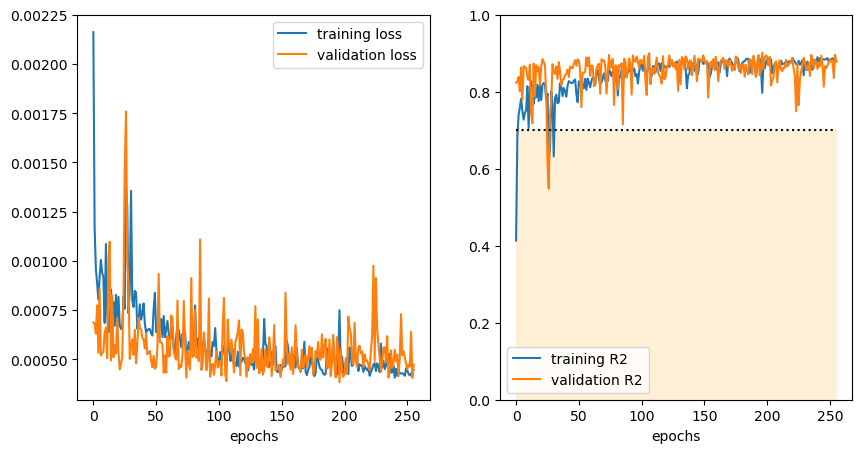

In [69]:
sb_eckigNN.show_learning_plots(sb_eckighist)

## reinforced concret columns, oval

### Linear Regression

In [70]:
sb_oval[["Nd", "Md", "d", "a", "b", "A", "V", "l", "Stückpreis"]].describe()

,Nd,Md,d,a,b,A,V,l,Stückpreis
count,252.000000,0.0,0.0,252.00000,252.000000,252.000000,252.000000,252.000000,252.000000
mean,4971.337302,NaN,NaN,0.28504,0.559405,0.163497,0.598060,3.819456,1357.206119
std,2622.519694,NaN,NaN,0.05835,0.149493,0.069648,0.261164,1.556533,931.750136
min,500.000000,NaN,NaN,0.20000,0.300000,0.080000,0.195200,2.440000,323.817000
25%,2900.000000,NaN,NaN,0.27000,0.480000,0.125000,0.369000,2.500000,712.765000
50%,4474.500000,NaN,NaN,0.27000,0.500000,0.129600,0.600000,2.900000,1054.345500
75%,6714.250000,NaN,NaN,0.30000,0.750000,0.240000,0.798336,5.930000,1565.850000
max,12300.000000,NaN,NaN,0.50000,0.900000,0.375000,1.139820,6.280000,4174.651000


In [71]:
sb_ovalx = sb_oval[["Nd", "A", "V", "l"]]
sb_ovaly = sb_oval[["Stückpreis"]]

In [256]:
sb_ovalx_train, sb_ovalx_test, sb_ovaly_train, sb_ovaly_test = cas.create_test_train_set(sb_ovalx, sb_ovaly)

In [257]:
sb_ovalLM = cas.LinearModel()
sb_ovalLMmodel = sb_ovalLM.linear_model(sb_ovalx_train, sb_ovaly_train)
print("MSE:")
print(f"{sb_ovalLM.mse(sb_ovalx_train, sb_ovaly_train, sb_ovalLMmodel):0.0f}")
print(f"{sb_ovalLM.mse(sb_ovalx_test, sb_ovaly_test, sb_ovalLMmodel):0.0f}")
print("\nR2:")
print(f"{sb_ovalLM.r2(sb_ovalx_train, sb_ovaly_train, sb_ovalLMmodel):0.4f}")
print(f"{sb_ovalLM.r2(sb_ovalx_test, sb_ovaly_test, sb_ovalLMmodel):0.4f}")

MSE:
424
432

R2:
0.7893
0.7949


### Neural Network

In [74]:
sb_ovalxnn = sb_ovalx.mul({"Nd": 1/10000, "A": 10, "l": 1/10, "V": 1})
sb_ovalynn = sb_ovaly.mul({"Stückpreis": 1/10000})

In [75]:
sb_ovalxnn_train, sb_ovalxnn_test, sb_ovalynn_train, sb_ovalynn_test = cas.create_test_train_set(sb_ovalxnn, sb_ovalynn)

In [76]:
sb_ovalNN = cas.NeuralNetwork()
sb_ovalNNmodel = sb_ovalNN.creat_network(4)

In [77]:
sb_ovalhist = sb_ovalNN.fit_model(sb_ovalNNmodel, sb_ovalxnn_train, sb_ovalynn_train, sb_ovalxnn_test, sb_ovalynn_test)

Epoch 1/256
7/7 [==============================] - 1s 30ms/step - loss: 0.0316 - r_square: -2.7767 - val_loss: 0.0075 - val_r_square: 0.2153
Epoch 2/256
7/7 [==============================] - 0s 8ms/step - loss: 0.0083 - r_square: 0.0070 - val_loss: 0.0103 - val_r_square: -0.0686
Epoch 3/256
7/7 [==============================] - 0s 8ms/step - loss: 0.0057 - r_square: 0.3152 - val_loss: 0.0054 - val_r_square: 0.4326
Epoch 4/256
7/7 [==============================] - 0s 9ms/step - loss: 0.0030 - r_square: 0.6391 - val_loss: 0.0036 - val_r_square: 0.6274
Epoch 5/256
7/7 [==============================] - 0s 8ms/step - loss: 0.0021 - r_square: 0.7462 - val_loss: 0.0019 - val_r_square: 0.8035
Epoch 6/256
7/7 [==============================] - 0s 9ms/step - loss: 0.0016 - r_square: 0.8056 - val_loss: 0.0017 - val_r_square: 0.8206
Epoch 7/256
7/7 [==============================] - 0s 8ms/step - loss: 0.0018 - r_square: 0.7877 - val_loss: 0.0024 - val_r_square: 0.7473
Epoch 8/256
7/7 [=======

7/7 [==============================] - 0s 9ms/step - loss: 5.3435e-04 - r_square: 0.9360 - val_loss: 3.1810e-04 - val_r_square: 0.9669
Epoch 58/256
7/7 [==============================] - 0s 9ms/step - loss: 3.6334e-04 - r_square: 0.9565 - val_loss: 2.9407e-04 - val_r_square: 0.9694
Epoch 59/256
7/7 [==============================] - 0s 10ms/step - loss: 3.9377e-04 - r_square: 0.9529 - val_loss: 2.5057e-04 - val_r_square: 0.9739
Epoch 60/256
7/7 [==============================] - 0s 10ms/step - loss: 4.1282e-04 - r_square: 0.9506 - val_loss: 4.0283e-04 - val_r_square: 0.9580
Epoch 61/256
7/7 [==============================] - 0s 9ms/step - loss: 4.6521e-04 - r_square: 0.9443 - val_loss: 2.5398e-04 - val_r_square: 0.9735
Epoch 62/256
7/7 [==============================] - 0s 9ms/step - loss: 5.0164e-04 - r_square: 0.9400 - val_loss: 3.8951e-04 - val_r_square: 0.9594
Epoch 63/256
7/7 [==============================] - 0s 9ms/step - loss: 6.1540e-04 - r_square: 0.9263 - val_loss: 0.0018 - 

7/7 [==============================] - 0s 9ms/step - loss: 3.5210e-04 - r_square: 0.9579 - val_loss: 5.6813e-04 - val_r_square: 0.9408
Epoch 113/256
7/7 [==============================] - 0s 8ms/step - loss: 5.5472e-04 - r_square: 0.9336 - val_loss: 2.9618e-04 - val_r_square: 0.9691
Epoch 114/256
7/7 [==============================] - 0s 9ms/step - loss: 4.1919e-04 - r_square: 0.9498 - val_loss: 4.8540e-04 - val_r_square: 0.9494
Epoch 115/256
7/7 [==============================] - 0s 9ms/step - loss: 4.5066e-04 - r_square: 0.9461 - val_loss: 3.1866e-04 - val_r_square: 0.9668
Epoch 116/256
7/7 [==============================] - 0s 9ms/step - loss: 3.6041e-04 - r_square: 0.9569 - val_loss: 3.8426e-04 - val_r_square: 0.9600
Epoch 117/256
7/7 [==============================] - 0s 8ms/step - loss: 3.6248e-04 - r_square: 0.9566 - val_loss: 1.8508e-04 - val_r_square: 0.9807
Epoch 118/256
7/7 [==============================] - 0s 9ms/step - loss: 3.3604e-04 - r_square: 0.9598 - val_loss: 2.736

7/7 [==============================] - 0s 9ms/step - loss: 3.0939e-04 - r_square: 0.9630 - val_loss: 6.5878e-04 - val_r_square: 0.9314
Epoch 168/256
7/7 [==============================] - 0s 8ms/step - loss: 6.9615e-04 - r_square: 0.9167 - val_loss: 2.3345e-04 - val_r_square: 0.9757
Epoch 169/256
7/7 [==============================] - 0s 9ms/step - loss: 4.4623e-04 - r_square: 0.9466 - val_loss: 3.4559e-04 - val_r_square: 0.9640
Epoch 170/256
7/7 [==============================] - 0s 9ms/step - loss: 4.0686e-04 - r_square: 0.9513 - val_loss: 2.2270e-04 - val_r_square: 0.9768
Epoch 171/256
7/7 [==============================] - 0s 8ms/step - loss: 3.1677e-04 - r_square: 0.9621 - val_loss: 3.6214e-04 - val_r_square: 0.9623
Epoch 172/256
7/7 [==============================] - 0s 9ms/step - loss: 4.0986e-04 - r_square: 0.9509 - val_loss: 0.0011 - val_r_square: 0.8905
Epoch 173/256
7/7 [==============================] - 0s 9ms/step - loss: 5.0767e-04 - r_square: 0.9392 - val_loss: 3.5821e-0

7/7 [==============================] - 0s 8ms/step - loss: 5.1493e-04 - r_square: 0.9384 - val_loss: 2.8975e-04 - val_r_square: 0.9698
Epoch 223/256
7/7 [==============================] - 0s 9ms/step - loss: 4.6908e-04 - r_square: 0.9439 - val_loss: 7.2566e-04 - val_r_square: 0.9244
Epoch 224/256
7/7 [==============================] - 0s 9ms/step - loss: 3.8705e-04 - r_square: 0.9537 - val_loss: 3.5214e-04 - val_r_square: 0.9633
Epoch 225/256
7/7 [==============================] - 0s 8ms/step - loss: 3.3078e-04 - r_square: 0.9604 - val_loss: 2.6171e-04 - val_r_square: 0.9727
Epoch 226/256
7/7 [==============================] - 0s 9ms/step - loss: 3.3558e-04 - r_square: 0.9598 - val_loss: 2.8479e-04 - val_r_square: 0.9703
Epoch 227/256
7/7 [==============================] - 0s 10ms/step - loss: 3.8933e-04 - r_square: 0.9534 - val_loss: 3.1584e-04 - val_r_square: 0.9671
Epoch 228/256
7/7 [==============================] - 0s 9ms/step - loss: 3.4976e-04 - r_square: 0.9581 - val_loss: 3.09

In [78]:
sb_ovalNN.evaluate(sb_ovalxnn_test, sb_ovalynn_test, sb_ovalNNmodel)

2/2 - 0s - loss: 3.4740e-04 - r_square: 0.9638 - 22ms/epoch - 11ms/step


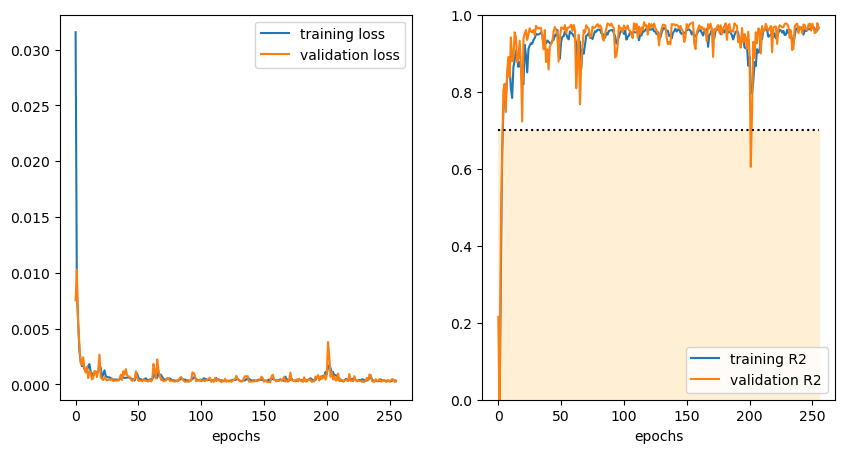

In [79]:
sb_ovalNN.show_learning_plots(sb_ovalhist)

## round

### Linear Model

In [80]:
rund[["Nd", "Md", "d", "a", "b", "A", "V", "l", "Stückpreis"]].describe()

,Nd,Md,d,a,b,A,V,l,Stückpreis
count,704.000000,5.000000,704.000000,0.0,0.0,704.000000,704.000000,704.000000,704.000000
mean,1989.923295,23.500000,0.265978,NaN,NaN,0.060743,0.202280,3.154425,695.869991
std,1805.122740,9.287088,0.081274,NaN,NaN,0.038556,0.158563,0.676408,377.062622
min,1.000000,17.500000,0.133000,NaN,NaN,0.013893,0.036399,2.279000,241.098000
25%,750.000000,20.000000,0.200000,NaN,NaN,0.031416,0.086080,2.740000,456.011400
50%,1400.000000,20.000000,0.250000,NaN,NaN,0.049087,0.162224,3.020000,602.968000
75%,2600.000000,20.000000,0.300000,NaN,NaN,0.070686,0.236798,3.342500,828.681750
max,11100.000000,40.000000,0.500000,NaN,NaN,0.196350,1.392118,7.090000,3432.520000


In [81]:
rundx = rund[["Nd", "A", "V", "l"]]
rundy = rund[["Stückpreis"]]

In [270]:
rundx_train, rundx_test, rundy_train, rundy_test = cas.create_test_train_set(rundx, rundy)

In [271]:
rundLM = cas.LinearModel()
rundLMmodel = rundLM.linear_model(rundx_train, rundy_train)
print("MSE:")
print(f"{rundLM.mse(rundx_train, rundy_train, rundLMmodel):0.0f}")
print(f"{rundLM.mse(rundx_test, rundy_test, rundLMmodel):0.0f}")
print("\nR2:")
print(f"{rundLM.r2(rundx_train, rundy_train, rundLMmodel):0.4f}")
print(f"{rundLM.r2(rundx_test, rundy_test, rundLMmodel):0.4f}")

MSE:
217
217

R2:
0.6518
0.7156


### Neural Network

In [84]:
rundxnn = rundx.mul({"Nd": 1/10000, "A": 10, "l": 1/10, "V": 1})
rundynn = rundy.mul({"Stückpreis": 1/10000})

In [272]:
rundxnn_train, rundxnn_test, rundynn_train, rundynn_test = cas.create_test_train_set(rundxnn, rundynn)

In [273]:
rundNN = cas.NeuralNetwork()
rundNNmodel = rundNN.creat_network(4)

In [274]:
rundhist = rundNN.fit_model(rundNNmodel, rundxnn_train, rundynn_train, rundxnn_test, rundynn_test)

Epoch 1/256
18/18 [==============================] - 0s 9ms/step - loss: 0.0054 - r_square: -2.6432 - val_loss: 5.7595e-04 - val_r_square: 0.4821
Epoch 2/256
18/18 [==============================] - 0s 4ms/step - loss: 9.7994e-04 - r_square: 0.3445 - val_loss: 3.9565e-04 - val_r_square: 0.6442
Epoch 3/256
18/18 [==============================] - 0s 4ms/step - loss: 6.1287e-04 - r_square: 0.5900 - val_loss: 3.1360e-04 - val_r_square: 0.7180
Epoch 4/256
18/18 [==============================] - 0s 4ms/step - loss: 5.2185e-04 - r_square: 0.6509 - val_loss: 3.2715e-04 - val_r_square: 0.7058
Epoch 5/256
18/18 [==============================] - 0s 4ms/step - loss: 5.2805e-04 - r_square: 0.6468 - val_loss: 5.7042e-04 - val_r_square: 0.4871
Epoch 6/256
18/18 [==============================] - 0s 4ms/step - loss: 8.4884e-04 - r_square: 0.4322 - val_loss: 4.2147e-04 - val_r_square: 0.6210
Epoch 7/256
18/18 [==============================] - 0s 3ms/step - loss: 6.0977e-04 - r_square: 0.5921 - val_

Epoch 56/256
18/18 [==============================] - 0s 3ms/step - loss: 4.2884e-04 - r_square: 0.7131 - val_loss: 5.7464e-04 - val_r_square: 0.4833
Epoch 57/256
18/18 [==============================] - 0s 3ms/step - loss: 4.3535e-04 - r_square: 0.7088 - val_loss: 5.4350e-04 - val_r_square: 0.5113
Epoch 58/256
18/18 [==============================] - 0s 3ms/step - loss: 4.1020e-04 - r_square: 0.7256 - val_loss: 3.0196e-04 - val_r_square: 0.7285
Epoch 59/256
18/18 [==============================] - 0s 3ms/step - loss: 3.7127e-04 - r_square: 0.7516 - val_loss: 3.0009e-04 - val_r_square: 0.7302
Epoch 60/256
18/18 [==============================] - 0s 3ms/step - loss: 3.7512e-04 - r_square: 0.7491 - val_loss: 3.1101e-04 - val_r_square: 0.7203
Epoch 61/256
18/18 [==============================] - 0s 3ms/step - loss: 3.5804e-04 - r_square: 0.7605 - val_loss: 3.0993e-04 - val_r_square: 0.7213
Epoch 62/256
18/18 [==============================] - 0s 4ms/step - loss: 3.5677e-04 - r_square: 0.7

18/18 [==============================] - 0s 3ms/step - loss: 3.9299e-04 - r_square: 0.7371 - val_loss: 5.1687e-04 - val_r_square: 0.5352
Epoch 111/256
18/18 [==============================] - 0s 4ms/step - loss: 3.8811e-04 - r_square: 0.7404 - val_loss: 3.4751e-04 - val_r_square: 0.6875
Epoch 112/256
18/18 [==============================] - 0s 4ms/step - loss: 4.0932e-04 - r_square: 0.7262 - val_loss: 2.8072e-04 - val_r_square: 0.7476
Epoch 113/256
18/18 [==============================] - 0s 4ms/step - loss: 3.5297e-04 - r_square: 0.7639 - val_loss: 4.0712e-04 - val_r_square: 0.6339
Epoch 114/256
18/18 [==============================] - 0s 3ms/step - loss: 3.8943e-04 - r_square: 0.7395 - val_loss: 4.5779e-04 - val_r_square: 0.5883
Epoch 115/256
18/18 [==============================] - 0s 3ms/step - loss: 4.3243e-04 - r_square: 0.7107 - val_loss: 4.1498e-04 - val_r_square: 0.6268
Epoch 116/256
18/18 [==============================] - 0s 4ms/step - loss: 3.8265e-04 - r_square: 0.7440 - v

18/18 [==============================] - 0s 4ms/step - loss: 3.4069e-04 - r_square: 0.7721 - val_loss: 3.8735e-04 - val_r_square: 0.6517
Epoch 165/256
18/18 [==============================] - 0s 4ms/step - loss: 3.6638e-04 - r_square: 0.7549 - val_loss: 3.0251e-04 - val_r_square: 0.7280
Epoch 166/256
18/18 [==============================] - 0s 4ms/step - loss: 3.8516e-04 - r_square: 0.7423 - val_loss: 3.4173e-04 - val_r_square: 0.6927
Epoch 167/256
18/18 [==============================] - 0s 4ms/step - loss: 3.6289e-04 - r_square: 0.7572 - val_loss: 4.5255e-04 - val_r_square: 0.5930
Epoch 168/256
18/18 [==============================] - 0s 4ms/step - loss: 3.2089e-04 - r_square: 0.7853 - val_loss: 3.1227e-04 - val_r_square: 0.7192
Epoch 169/256
18/18 [==============================] - 0s 4ms/step - loss: 3.7787e-04 - r_square: 0.7472 - val_loss: 3.5578e-04 - val_r_square: 0.6801
Epoch 170/256
18/18 [==============================] - 0s 4ms/step - loss: 3.4709e-04 - r_square: 0.7678 - v

18/18 [==============================] - 0s 4ms/step - loss: 4.1720e-04 - r_square: 0.7209 - val_loss: 3.2224e-04 - val_r_square: 0.7102
Epoch 219/256
18/18 [==============================] - 0s 3ms/step - loss: 3.2938e-04 - r_square: 0.7797 - val_loss: 3.0727e-04 - val_r_square: 0.7237
Epoch 220/256
18/18 [==============================] - 0s 4ms/step - loss: 3.4066e-04 - r_square: 0.7721 - val_loss: 3.1670e-04 - val_r_square: 0.7152
Epoch 221/256
18/18 [==============================] - 0s 4ms/step - loss: 3.3911e-04 - r_square: 0.7732 - val_loss: 3.4079e-04 - val_r_square: 0.6936
Epoch 222/256
18/18 [==============================] - 0s 4ms/step - loss: 3.1895e-04 - r_square: 0.7866 - val_loss: 4.3147e-04 - val_r_square: 0.6120
Epoch 223/256
18/18 [==============================] - 0s 3ms/step - loss: 3.6742e-04 - r_square: 0.7542 - val_loss: 3.8549e-04 - val_r_square: 0.6534
Epoch 224/256
18/18 [==============================] - 0s 4ms/step - loss: 3.3550e-04 - r_square: 0.7756 - v

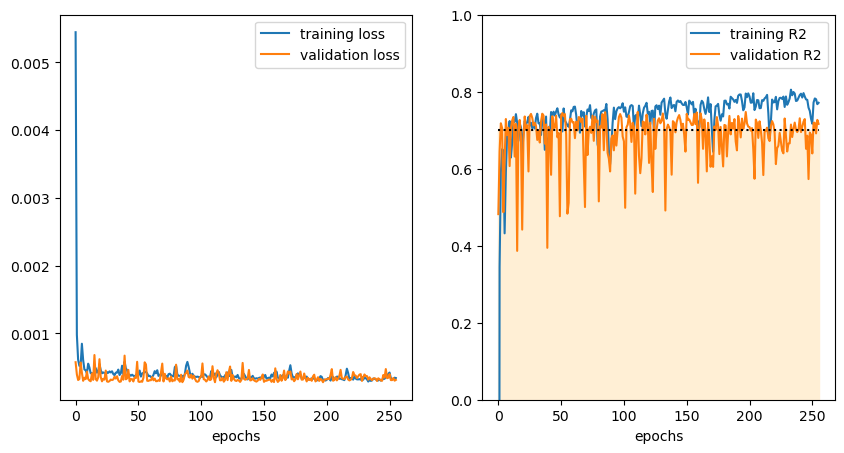

In [275]:
rundNN.show_learning_plots(rundhist)

In [277]:
rundNN.evaluate(rundxnn_test, rundynn_test, rundNNmodel)

5/5 - 0s - loss: 3.1521e-04 - r_square: 0.7166 - 24ms/epoch - 5ms/step


## angular

### Linerar Model

In [90]:
eckig[["Nd", "Md", "d", "a", "b", "A", "V", "l", "Stückpreis"]].describe()

,Nd,Md,d,a,b,A,V,l,Stückpreis
count,2326.000000,9.000000,0.0,2326.000000,2326.000000,2326.000000,2326.000000,2326.000000,2326.000000
mean,2738.012038,42.222222,NaN,0.275211,0.374372,0.106568,0.364962,3.332963,859.888139
std,2386.941172,10.639288,NaN,0.069810,0.141073,0.056358,0.259287,1.007934,610.778334
min,1.000000,20.000000,NaN,0.100000,0.150000,0.015000,0.030975,2.060000,111.891000
25%,1100.000000,40.000000,NaN,0.220000,0.300000,0.072600,0.201338,2.660000,504.920250
50%,2018.500000,45.000000,NaN,0.300000,0.300000,0.090000,0.300600,3.100000,701.288633
75%,3638.250000,50.000000,NaN,0.300000,0.500000,0.132000,0.432900,3.570000,975.247275
max,15000.000000,50.000000,NaN,0.600000,1.000000,0.360000,2.635500,9.140000,6551.896000


In [91]:
eckigx = eckig[["Nd", "A", "V", "l"]]
eckigy = eckig[["Stückpreis"]]

In [291]:
eckigx_train, eckigx_test, eckigy_train, eckigy_test = cas.create_test_train_set(eckigx, eckigy)

In [292]:
eckigLM = cas.LinearModel()
eckigLMmodel = eckigLM.linear_model(eckigx_train, eckigy_train)
print("MSE:")
print(f"{eckigLM.mse(eckigx_train, eckigy_train, eckigLMmodel):0.0f}")
print(f"{eckigLM.mse(eckigx_test, eckigy_test, eckigLMmodel):0.0f}")
print("\nR2:")
print(f"{eckigLM.r2(eckigx_train, eckigy_train, eckigLMmodel):0.4f}")
print(f"{eckigLM.r2(eckigx_test, eckigy_test, eckigLMmodel):0.4f}")

MSE:
342
304

R2:
0.6966
0.7119


### Neural Network

In [94]:
eckigxnn = eckigx.mul({"Nd": 1/10000, "A": 10, "l": 1/10, "V": 1})
eckigynn = eckigy.mul({"Stückpreis": 1/10000})

In [293]:
eckigxnn_train, eckigxnn_test, eckigynn_train, eckigynn_test = cas.create_test_train_set(eckigxnn, eckigynn)

In [294]:
eckigNN = cas.NeuralNetwork()
eckigNNmodel = eckigNN.creat_network(4)

In [295]:
eckighist = eckigNN.fit_model(eckigNNmodel, eckigxnn_train, eckigynn_train, eckigxnn_test, eckigynn_test)

Epoch 1/256
59/59 [==============================] - 1s 4ms/step - loss: 0.0037 - r_square: -0.0418 - val_loss: 8.7342e-04 - val_r_square: 0.7975
Epoch 2/256
59/59 [==============================] - 0s 2ms/step - loss: 0.0010 - r_square: 0.7206 - val_loss: 0.0054 - val_r_square: -0.2507
Epoch 3/256
59/59 [==============================] - 0s 2ms/step - loss: 0.0022 - r_square: 0.3967 - val_loss: 0.0012 - val_r_square: 0.7150
Epoch 4/256
59/59 [==============================] - 0s 2ms/step - loss: 0.0011 - r_square: 0.6823 - val_loss: 0.0013 - val_r_square: 0.6993
Epoch 5/256
59/59 [==============================] - 0s 2ms/step - loss: 9.6099e-04 - r_square: 0.7317 - val_loss: 6.1236e-04 - val_r_square: 0.8580
Epoch 6/256
59/59 [==============================] - 0s 2ms/step - loss: 8.4727e-04 - r_square: 0.7635 - val_loss: 6.1141e-04 - val_r_square: 0.8583
Epoch 7/256
59/59 [==============================] - 0s 2ms/step - loss: 8.9129e-04 - r_square: 0.7512 - val_loss: 7.1739e-04 - val_

59/59 [==============================] - 0s 2ms/step - loss: 7.2094e-04 - r_square: 0.7987 - val_loss: 7.0293e-04 - val_r_square: 0.8370
Epoch 57/256
59/59 [==============================] - 0s 2ms/step - loss: 8.6360e-04 - r_square: 0.7589 - val_loss: 4.8828e-04 - val_r_square: 0.8868
Epoch 58/256
59/59 [==============================] - 0s 2ms/step - loss: 7.0687e-04 - r_square: 0.8027 - val_loss: 5.7537e-04 - val_r_square: 0.8666
Epoch 59/256
59/59 [==============================] - 0s 2ms/step - loss: 7.2973e-04 - r_square: 0.7963 - val_loss: 7.0175e-04 - val_r_square: 0.8373
Epoch 60/256
59/59 [==============================] - 0s 2ms/step - loss: 7.3450e-04 - r_square: 0.7950 - val_loss: 8.1720e-04 - val_r_square: 0.8106
Epoch 61/256
59/59 [==============================] - 0s 2ms/step - loss: 8.6274e-04 - r_square: 0.7592 - val_loss: 7.9072e-04 - val_r_square: 0.8167
Epoch 62/256
59/59 [==============================] - 0s 2ms/step - loss: 6.7714e-04 - r_square: 0.8110 - val_los

59/59 [==============================] - 0s 2ms/step - loss: 5.9157e-04 - r_square: 0.8349 - val_loss: 4.8294e-04 - val_r_square: 0.8880
Epoch 111/256
59/59 [==============================] - 0s 2ms/step - loss: 6.0862e-04 - r_square: 0.8301 - val_loss: 5.5494e-04 - val_r_square: 0.8714
Epoch 112/256
59/59 [==============================] - 0s 2ms/step - loss: 5.8625e-04 - r_square: 0.8363 - val_loss: 8.4239e-04 - val_r_square: 0.8047
Epoch 113/256
59/59 [==============================] - 0s 2ms/step - loss: 6.5372e-04 - r_square: 0.8175 - val_loss: 3.5880e-04 - val_r_square: 0.9168
Epoch 114/256
59/59 [==============================] - 0s 2ms/step - loss: 5.4282e-04 - r_square: 0.8485 - val_loss: 4.5825e-04 - val_r_square: 0.8938
Epoch 115/256
59/59 [==============================] - 0s 2ms/step - loss: 5.9261e-04 - r_square: 0.8346 - val_loss: 4.6467e-04 - val_r_square: 0.8923
Epoch 116/256
59/59 [==============================] - 0s 2ms/step - loss: 6.2763e-04 - r_square: 0.8248 - v

59/59 [==============================] - 0s 2ms/step - loss: 6.1953e-04 - r_square: 0.8271 - val_loss: 3.4914e-04 - val_r_square: 0.9191
Epoch 165/256
59/59 [==============================] - 0s 2ms/step - loss: 6.1048e-04 - r_square: 0.8296 - val_loss: 4.5726e-04 - val_r_square: 0.8940
Epoch 166/256
59/59 [==============================] - 0s 2ms/step - loss: 6.2176e-04 - r_square: 0.8264 - val_loss: 4.3593e-04 - val_r_square: 0.8989
Epoch 167/256
59/59 [==============================] - 0s 2ms/step - loss: 7.1081e-04 - r_square: 0.8016 - val_loss: 0.0011 - val_r_square: 0.7551
Epoch 168/256
59/59 [==============================] - 0s 2ms/step - loss: 0.0025 - r_square: 0.3037 - val_loss: 0.0012 - val_r_square: 0.7212
Epoch 169/256
59/59 [==============================] - 0s 2ms/step - loss: 0.0012 - r_square: 0.6546 - val_loss: 8.0522e-04 - val_r_square: 0.8133
Epoch 170/256
59/59 [==============================] - 0s 2ms/step - loss: 9.5705e-04 - r_square: 0.7328 - val_loss: 6.0775e

59/59 [==============================] - 0s 2ms/step - loss: 5.2995e-04 - r_square: 0.8521 - val_loss: 4.0668e-04 - val_r_square: 0.9057
Epoch 219/256
59/59 [==============================] - 0s 2ms/step - loss: 5.4149e-04 - r_square: 0.8488 - val_loss: 4.1560e-04 - val_r_square: 0.9037
Epoch 220/256
59/59 [==============================] - 0s 2ms/step - loss: 6.0273e-04 - r_square: 0.8317 - val_loss: 4.7495e-04 - val_r_square: 0.8899
Epoch 221/256
59/59 [==============================] - 0s 2ms/step - loss: 5.6871e-04 - r_square: 0.8412 - val_loss: 4.7989e-04 - val_r_square: 0.8888
Epoch 222/256
59/59 [==============================] - 0s 2ms/step - loss: 5.6552e-04 - r_square: 0.8421 - val_loss: 4.2584e-04 - val_r_square: 0.9013
Epoch 223/256
59/59 [==============================] - 0s 2ms/step - loss: 5.2276e-04 - r_square: 0.8541 - val_loss: 3.8897e-04 - val_r_square: 0.9098
Epoch 224/256
59/59 [==============================] - 0s 2ms/step - loss: 5.2999e-04 - r_square: 0.8520 - v

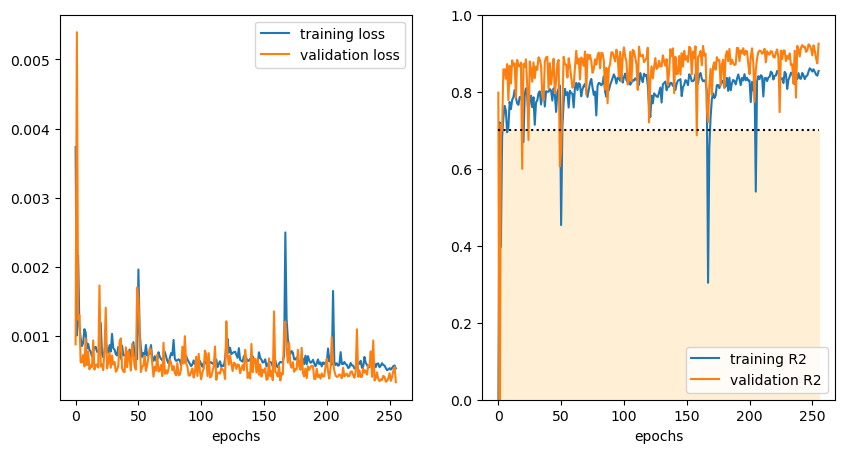

In [296]:
eckigNN.show_learning_plots(eckighist)

In [297]:
eckigNN.evaluate(eckigxnn_test, eckigynn_test, eckigNNmodel)

15/15 - 0s - loss: 3.2421e-04 - r_square: 0.9248 - 30ms/epoch - 2ms/step


## oval

### Linear Model

In [100]:
oval[["Nd", "Md", "d", "a", "b", "A", "V", "l", "Stückpreis"]].describe()

,Nd,Md,d,a,b,A,V,l,Stückpreis
count,252.000000,0.0,0.0,252.00000,252.000000,252.000000,252.000000,252.000000,252.000000
mean,4971.337302,NaN,NaN,0.28504,0.559405,0.163497,0.598060,3.819456,1357.206119
std,2622.519694,NaN,NaN,0.05835,0.149493,0.069648,0.261164,1.556533,931.750136
min,500.000000,NaN,NaN,0.20000,0.300000,0.080000,0.195200,2.440000,323.817000
25%,2900.000000,NaN,NaN,0.27000,0.480000,0.125000,0.369000,2.500000,712.765000
50%,4474.500000,NaN,NaN,0.27000,0.500000,0.129600,0.600000,2.900000,1054.345500
75%,6714.250000,NaN,NaN,0.30000,0.750000,0.240000,0.798336,5.930000,1565.850000
max,12300.000000,NaN,NaN,0.50000,0.900000,0.375000,1.139820,6.280000,4174.651000


In [101]:
ovalx = sb_oval[["Nd", "A", "V", "l"]]
ovaly = sb_oval[["Stückpreis"]]

In [102]:
ovalx_train, ovalx_test, ovaly_train, ovaly_test = cas.create_test_train_set(ovalx, ovaly)

In [103]:
ovalLM = cas.LinearModel()
ovalLMmodel = ovalLM.linear_model(ovalx_train, ovaly_train)
print("MSE:")
print(f"{ovalLM.mse(ovalx_train, ovaly_train, ovalLMmodel):0.0f}")
print(f"{ovalLM.mse(ovalx_test, ovaly_test, ovalLMmodel):0.0f}")
print("\nR2:")
print(f"{ovalLM.r2(ovalx_train, ovaly_train, ovalLMmodel):0.4f}")
print(f"{ovalLM.r2(ovalx_test, ovaly_test, ovalLMmodel):0.4f}")

MSE:
409
482

R2:
0.7963
0.7694


### Neural Network

In [104]:
ovalxnn = ovalx.mul({"Nd": 1/10000, "A": 10, "l": 1/10, "V": 1})
ovalynn = ovaly.mul({"Stückpreis": 1/10000})

In [105]:
ovalxnn_train, ovalxnn_test, ovalynn_train, ovalynn_test = cas.create_test_train_set(ovalxnn, ovalynn)

In [106]:
ovalNN = cas.NeuralNetwork()
ovalNNmodel = ovalNN.creat_network(4)

In [107]:
ovalhist = ovalNN.fit_model(ovalNNmodel, ovalxnn_train, ovalynn_train, ovalxnn_test, ovalynn_test)

Epoch 1/256
7/7 [==============================] - 1s 29ms/step - loss: 0.0480 - r_square: -4.5599 - val_loss: 0.0057 - val_r_square: 0.3402
Epoch 2/256
7/7 [==============================] - 0s 8ms/step - loss: 0.0040 - r_square: 0.5340 - val_loss: 0.0029 - val_r_square: 0.6604
Epoch 3/256
7/7 [==============================] - 0s 9ms/step - loss: 0.0029 - r_square: 0.6598 - val_loss: 0.0023 - val_r_square: 0.7275
Epoch 4/256
7/7 [==============================] - 0s 8ms/step - loss: 0.0022 - r_square: 0.7478 - val_loss: 0.0027 - val_r_square: 0.6898
Epoch 5/256
7/7 [==============================] - 0s 8ms/step - loss: 0.0021 - r_square: 0.7515 - val_loss: 0.0018 - val_r_square: 0.7952
Epoch 6/256
7/7 [==============================] - 0s 8ms/step - loss: 0.0019 - r_square: 0.7742 - val_loss: 0.0018 - val_r_square: 0.7948
Epoch 7/256
7/7 [==============================] - 0s 8ms/step - loss: 0.0013 - r_square: 0.8527 - val_loss: 0.0021 - val_r_square: 0.7601
Epoch 8/256
7/7 [========

Epoch 58/256
7/7 [==============================] - 0s 9ms/step - loss: 3.3879e-04 - r_square: 0.9608 - val_loss: 5.9048e-04 - val_r_square: 0.9312
Epoch 59/256
7/7 [==============================] - 0s 8ms/step - loss: 4.2710e-04 - r_square: 0.9505 - val_loss: 5.1695e-04 - val_r_square: 0.9397
Epoch 60/256
7/7 [==============================] - 0s 9ms/step - loss: 8.6164e-04 - r_square: 0.9002 - val_loss: 0.0011 - val_r_square: 0.8738
Epoch 61/256
7/7 [==============================] - 0s 10ms/step - loss: 7.8791e-04 - r_square: 0.9087 - val_loss: 5.4793e-04 - val_r_square: 0.9361
Epoch 62/256
7/7 [==============================] - 0s 9ms/step - loss: 6.2964e-04 - r_square: 0.9271 - val_loss: 7.1001e-04 - val_r_square: 0.9172
Epoch 63/256
7/7 [==============================] - 0s 9ms/step - loss: 6.6171e-04 - r_square: 0.9234 - val_loss: 5.2653e-04 - val_r_square: 0.9386
Epoch 64/256
7/7 [==============================] - 0s 9ms/step - loss: 3.8037e-04 - r_square: 0.9559 - val_loss: 7

Epoch 114/256
7/7 [==============================] - 0s 8ms/step - loss: 2.6274e-04 - r_square: 0.9696 - val_loss: 4.6047e-04 - val_r_square: 0.9463
Epoch 115/256
7/7 [==============================] - 0s 10ms/step - loss: 2.6916e-04 - r_square: 0.9688 - val_loss: 6.1188e-04 - val_r_square: 0.9287
Epoch 116/256
7/7 [==============================] - 0s 9ms/step - loss: 2.5454e-04 - r_square: 0.9705 - val_loss: 4.4424e-04 - val_r_square: 0.9482
Epoch 117/256
7/7 [==============================] - 0s 9ms/step - loss: 2.7819e-04 - r_square: 0.9678 - val_loss: 5.2031e-04 - val_r_square: 0.9393
Epoch 118/256
7/7 [==============================] - 0s 10ms/step - loss: 2.5138e-04 - r_square: 0.9709 - val_loss: 6.0347e-04 - val_r_square: 0.9296
Epoch 119/256
7/7 [==============================] - 0s 8ms/step - loss: 2.9942e-04 - r_square: 0.9653 - val_loss: 4.7821e-04 - val_r_square: 0.9442
Epoch 120/256
7/7 [==============================] - 0s 9ms/step - loss: 2.6231e-04 - r_square: 0.9696 -

Epoch 169/256
7/7 [==============================] - 0s 9ms/step - loss: 2.6610e-04 - r_square: 0.9692 - val_loss: 0.0010 - val_r_square: 0.8782
Epoch 170/256
7/7 [==============================] - 0s 10ms/step - loss: 3.6645e-04 - r_square: 0.9576 - val_loss: 7.0766e-04 - val_r_square: 0.9175
Epoch 171/256
7/7 [==============================] - 0s 9ms/step - loss: 4.2554e-04 - r_square: 0.9507 - val_loss: 6.3075e-04 - val_r_square: 0.9265
Epoch 172/256
7/7 [==============================] - 0s 10ms/step - loss: 4.1501e-04 - r_square: 0.9519 - val_loss: 6.4971e-04 - val_r_square: 0.9242
Epoch 173/256
7/7 [==============================] - 0s 9ms/step - loss: 4.7711e-04 - r_square: 0.9447 - val_loss: 0.0013 - val_r_square: 0.8476
Epoch 174/256
7/7 [==============================] - 0s 9ms/step - loss: 3.6757e-04 - r_square: 0.9574 - val_loss: 4.5709e-04 - val_r_square: 0.9467
Epoch 175/256
7/7 [==============================] - 0s 9ms/step - loss: 3.4701e-04 - r_square: 0.9598 - val_los

Epoch 224/256
7/7 [==============================] - 0s 10ms/step - loss: 2.0109e-04 - r_square: 0.9767 - val_loss: 4.3917e-04 - val_r_square: 0.9488
Epoch 225/256
7/7 [==============================] - 0s 11ms/step - loss: 2.1784e-04 - r_square: 0.9748 - val_loss: 4.5485e-04 - val_r_square: 0.9470
Epoch 226/256
7/7 [==============================] - 0s 9ms/step - loss: 2.3013e-04 - r_square: 0.9733 - val_loss: 3.5856e-04 - val_r_square: 0.9582
Epoch 227/256
7/7 [==============================] - 0s 10ms/step - loss: 2.1094e-04 - r_square: 0.9756 - val_loss: 3.7296e-04 - val_r_square: 0.9565
Epoch 228/256
7/7 [==============================] - 0s 10ms/step - loss: 2.5077e-04 - r_square: 0.9710 - val_loss: 4.2032e-04 - val_r_square: 0.9510
Epoch 229/256
7/7 [==============================] - 0s 11ms/step - loss: 2.4908e-04 - r_square: 0.9711 - val_loss: 4.3197e-04 - val_r_square: 0.9496
Epoch 230/256
7/7 [==============================] - 0s 10ms/step - loss: 3.0596e-04 - r_square: 0.96

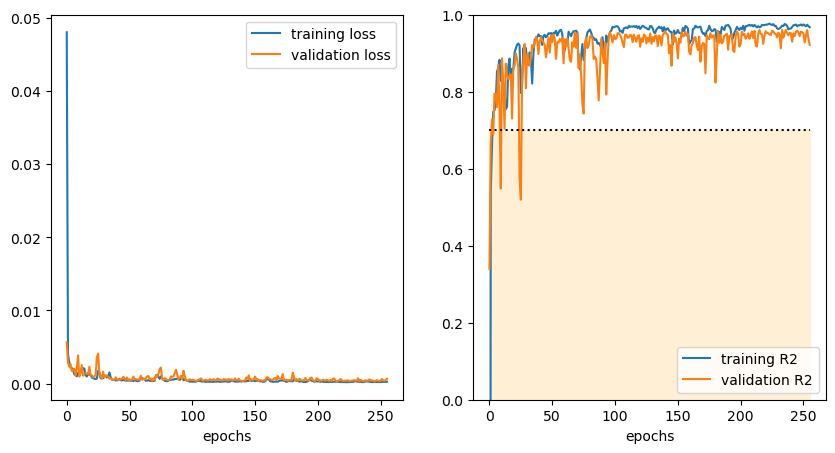

In [108]:
ovalNN.show_learning_plots(ovalhist)

In [109]:
ovalNN.evaluate(ovalxnn_test, ovalynn_test, ovalNNmodel)

2/2 - 0s - loss: 6.7206e-04 - r_square: 0.9216 - 24ms/epoch - 12ms/step


# Principal Component Analysis (PCA)


## all data, no filtering

### Preparing the data

In [110]:
from sklearn.decomposition import PCA


In [309]:
df_pca = df

df_pca = df.drop(["Datum", "Stückpreis", "Ort", "Projektname", "Bezeichnung", "Einkauf_Baumeister",
                 "Baumeister", "Rabatt inkl. Skonto Baumeister", "Baumeister inkl. Rabatt & Teuerung", 
                 "Bemerkungen", "Einkauf_LoMa", "Rabatt inkl. Skonto LoMa", "Teuerung", "Hersteller", "CHF/m3",
                 "LoMa", "Transport", "Total Preis",], axis=1)

df_pca = df_pca.fillna(0, inplace=False)

df_pca = df_pca.replace(to_replace=["x", "X"], value=[1, 1])

pcax_train, pcax_test, pcay_train, pcay_test = cas.create_test_train_set(df_pca, df["Stückpreis"])

# df_pca.info()
pcax_train

,Stahlbetonstütze,Stahlbetonverbundstütze,rund,eckig,oval,d,a,b,l,Nd,Md,Stück,A,V,N/mm2
1933,1,0,1,0,0,0.4,0.00,0.00,3.30,6300,0.0,1,0.125664,0.414690,50.133807
2000,1,0,0,0,0,0.0,0.00,0.00,3.72,4706,0.0,1,0.100000,0.372000,47.060000
1094,1,0,0,1,0,0.0,0.20,0.20,2.60,1200,0.0,60,0.040000,0.104000,30.000000
1407,1,0,0,1,0,0.0,0.30,0.30,2.30,800,0.0,1,0.090000,0.207000,8.888889
145,1,0,1,0,0,0.3,0.00,0.00,3.30,500,0.0,10,0.070686,0.233263,7.073553
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2832,1,0,0,1,0,0.0,0.25,0.40,3.32,4385,0.0,1,0.100000,0.332000,43.850000
2077,1,0,0,1,0,0.0,0.20,0.20,2.86,400,0.0,1,0.040000,0.114400,10.000000
3168,0,1,0,1,0,0.0,0.12,0.20,2.98,800,0.0,1,0.024000,0.071520,33.333333
1336,1,0,0,1,0,0.0,0.22,0.24,2.66,300,0.0,5,0.052800,0.140448,5.681818


### PCA

In [310]:
pca0 = PCA() 
pca0.fit(pcax_train)

PCA()

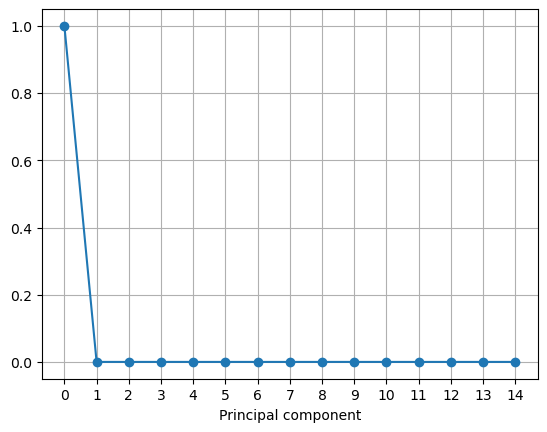

In [311]:
plt.plot(pca0.explained_variance_ratio_,'-o')
plt.xlabel("Principal component")
plt.xticks(range(0, pcax_train.shape[1]))
plt.grid()

In [312]:
dfv = pd.DataFrame(pca0.components_.transpose(), 
                  columns = [f'V_{i+0}' for i in range(len(pcax_train.columns))], 
                  index=pcax_train.columns)
dfv

,V_0,V_1,V_2,V_3,V_4,V_5,V_6,V_7,V_8,V_9,V_10,V_11,V_12,V_13,V_14
Stahlbetonstütze,0.000013,-0.000605,0.004541,0.000837,0.015658,-0.055743,0.030965,-0.701635,0.048466,0.008472,-0.003930,-0.016269,0.024893,0.007427,7.071068e-01
Stahlbetonverbundstütze,-0.000013,0.000605,-0.004541,-0.000837,-0.015658,0.055743,-0.030965,0.701635,-0.048466,-0.008472,0.003930,0.016269,-0.024893,-0.007427,7.071068e-01
rund,-0.000026,0.003436,-0.010947,0.001251,-0.017060,0.580178,-0.469254,-0.033388,0.403643,-0.443264,0.079456,-0.132181,0.209943,0.119927,1.292800e-12
eckig,-0.000004,-0.002216,0.008809,-0.000853,-0.016240,-0.746413,-0.340009,0.050724,0.152302,-0.399867,0.184844,0.239192,0.172601,0.141707,1.386234e-12
oval,0.000028,-0.000848,0.002503,-0.001990,0.027996,0.131815,0.758852,0.024431,0.086782,-0.456597,0.289722,0.239737,0.169164,0.139054,7.160761e-13
d,-0.000003,0.000879,-0.002362,0.000325,-0.001016,0.160287,-0.144451,-0.055913,0.086909,-0.113362,0.117831,0.630368,-0.634885,-0.339967,-3.057843e-12
a,0.000020,-0.001065,0.004515,-0.001244,0.012616,-0.156275,0.075786,0.019745,0.152653,-0.130537,0.522131,-0.642275,-0.400299,-0.289035,-3.607785e-12
b,0.000038,-0.001968,0.008069,0.000887,-0.002151,-0.179594,0.238657,0.066328,0.630110,-0.116974,-0.656704,-0.118487,-0.147376,-0.169043,1.423267e-14
l,0.000062,-0.001907,0.004016,-0.019008,0.989317,-0.001616,-0.040928,0.014020,-0.076990,-0.084794,-0.065965,-0.024161,-0.029732,0.007771,1.001071e-15
Nd,0.999991,-0.000637,0.004284,0.000001,-0.000097,0.000091,-0.000079,0.000028,-0.000091,-0.000048,-0.000018,-0.000001,0.000009,-0.000002,0.000000e+00


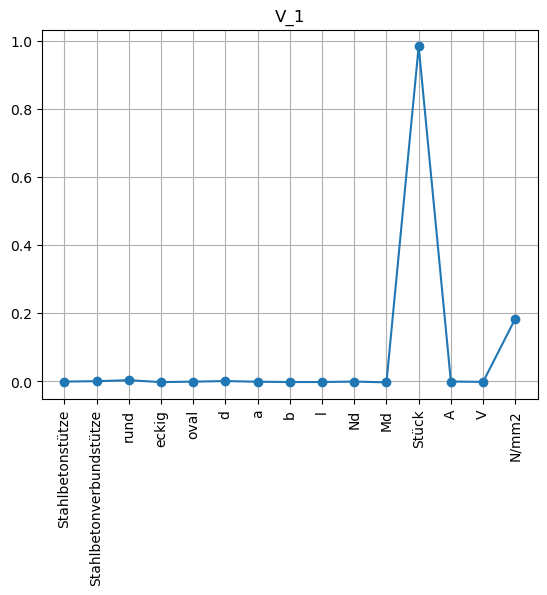

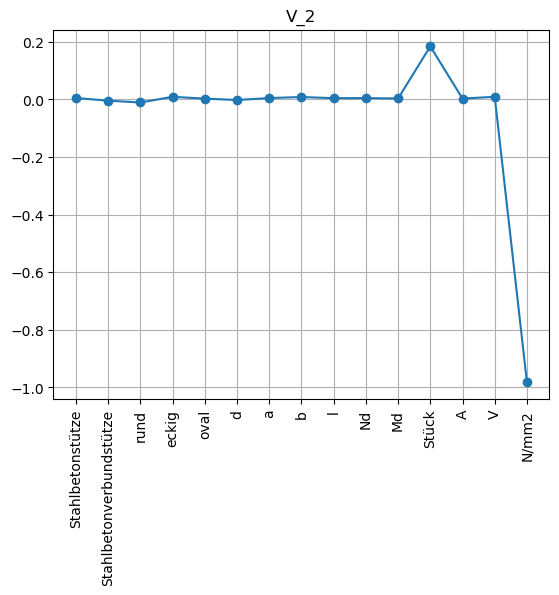

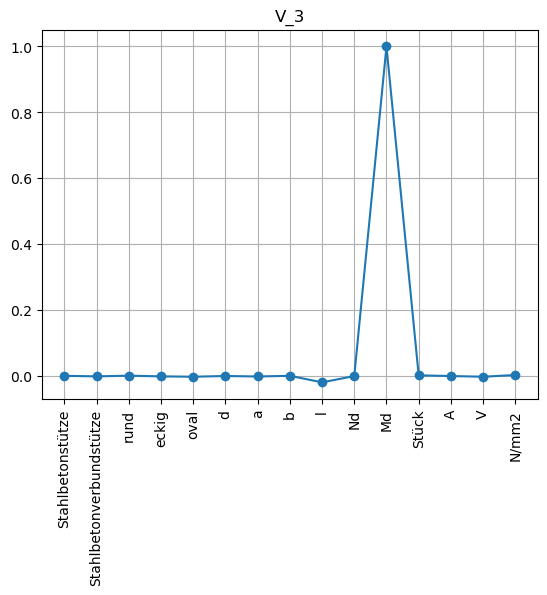

In [313]:
for vector in ['V_1','V_2','V_3']:
    plt.figure()
    plt.title(vector)
    plt.plot(np.arange(len(pcax_train.columns)),list(dfv[vector]),'-o')
    _=plt.xticks(np.arange(len(pcax_train.columns)),pcax_train.columns, rotation=90)
    plt.grid()

### Reducing features

In [322]:
pca = PCA(n_components = 2) 
pca.fit_transform(pcax_train)
pcax_train_transformed = pca.fit_transform(pcax_train)
pcax_test_transformed = pca.transform(pcax_test)

In [323]:
print(f"{np.sum(pca.explained_variance_ratio_[:2]):0.6f}")

0.999969


### Linear Model

In [325]:
pcaLM = cas.LinearModel()
pcaLMmodel = pcaLM.linear_model(pcax_train_transformed, pcay_train)
print("MSE:")
print(f"Train: {np.std(pcay_train - pcaLMmodel.predict(pcax_train_transformed)):0.0f}")
print(f"Test: {np.std(pcay_test - pcaLMmodel.predict(pcax_test_transformed)):0.0f}")
print("\nR2:")
print(f"Train: {pcaLM.r2(pcax_train_transformed, pcay_train, pcaLMmodel):0.4f}")
print(f"Test: {pcaLM.r2(pcax_test_transformed, pcay_test, pcaLMmodel):0.4f}")


MSE:
Train: 497
Test: 540

R2:
Train: 0.3197
Test: 0.3200


#### Numbe of Components = n

In [119]:
n = 4

pcaB = PCA(n_components = n) 
pcaB.fit_transform(pcax_train)
pcax_train_transformedB = pcaB.fit_transform(pcax_train)
pcax_test_transformedB = pcaB.transform(pcax_test)

In [120]:
print(f"{np.sum(pcaB.explained_variance_ratio_[:n]):0.6f}")

0.999972


In [121]:
pcaLMB = cas.LinearModel()
pcaLMmodelB = pcaLMB.linear_model(pcax_train_transformedB, pcay_train)
print("MSE:")
print(f"{np.std(pcay_train - pcaLMmodelB.predict(pcax_train_transformedB)):0.0f}")
print(f"{np.std(pcay_test - pcaLMmodelB.predict(pcax_test_transformedB)):0.0f}")
print("\nR2:")
print(f"{pcaLM.r2(pcax_train_transformedB, pcay_train, pcaLMmodelB):0.4f}")
print(f"{pcaLM.r2(pcax_test_transformedB, pcay_test, pcaLMmodelB):0.4f}")

MSE:
130
118

R2:
0.9555
0.9623


### Neural Network

- scaling values

In [326]:
from sklearn.preprocessing import StandardScaler


s = StandardScaler()
s.fit(pcax_train_transformed)
pcax_train_transformed_scaled = s.transform(pcax_train_transformed)
pcax_test_transformed_scaled = s.transform(pcax_test_transformed)



- create Neural Network

In [327]:
pcaNN = cas.NeuralNetwork()
pcaNNmodel = pcaNN.creat_network(2)

- fitting

In [330]:
pcahist = pcaNN.fit_model(pcaNNmodel, 
                          pcax_train_transformed_scaled, 
                          pcay_train/10000, 
                          pcax_test_transformed_scaled, 
                          pcay_test/10000, 
                          epoch=512)

Epoch 1/512
85/85 [==============================] - 0s 2ms/step - loss: 0.0022 - r_square: 0.3824 - val_loss: 0.0026 - val_r_square: 0.3924
Epoch 2/512
85/85 [==============================] - 0s 2ms/step - loss: 0.0022 - r_square: 0.3865 - val_loss: 0.0026 - val_r_square: 0.3835
Epoch 3/512
85/85 [==============================] - 0s 2ms/step - loss: 0.0023 - r_square: 0.3790 - val_loss: 0.0025 - val_r_square: 0.4118
Epoch 4/512
85/85 [==============================] - 0s 2ms/step - loss: 0.0023 - r_square: 0.3702 - val_loss: 0.0027 - val_r_square: 0.3815
Epoch 5/512
85/85 [==============================] - 0s 2ms/step - loss: 0.0022 - r_square: 0.3893 - val_loss: 0.0025 - val_r_square: 0.4134
Epoch 6/512
85/85 [==============================] - 0s 2ms/step - loss: 0.0022 - r_square: 0.3950 - val_loss: 0.0026 - val_r_square: 0.3891
Epoch 7/512
85/85 [==============================] - 0s 2ms/step - loss: 0.0023 - r_square: 0.3748 - val_loss: 0.0026 - val_r_square: 0.4037
Epoch 8/512
8

Epoch 59/512
85/85 [==============================] - 0s 1ms/step - loss: 0.0022 - r_square: 0.3983 - val_loss: 0.0024 - val_r_square: 0.4353
Epoch 60/512
85/85 [==============================] - 0s 2ms/step - loss: 0.0022 - r_square: 0.3938 - val_loss: 0.0026 - val_r_square: 0.4044
Epoch 61/512
85/85 [==============================] - 0s 1ms/step - loss: 0.0022 - r_square: 0.3879 - val_loss: 0.0025 - val_r_square: 0.4070
Epoch 62/512
85/85 [==============================] - 0s 1ms/step - loss: 0.0022 - r_square: 0.4063 - val_loss: 0.0026 - val_r_square: 0.3926
Epoch 63/512
85/85 [==============================] - 0s 1ms/step - loss: 0.0023 - r_square: 0.3752 - val_loss: 0.0025 - val_r_square: 0.4211
Epoch 64/512
85/85 [==============================] - 0s 2ms/step - loss: 0.0022 - r_square: 0.3904 - val_loss: 0.0028 - val_r_square: 0.3512
Epoch 65/512
85/85 [==============================] - 0s 1ms/step - loss: 0.0022 - r_square: 0.4037 - val_loss: 0.0027 - val_r_square: 0.3642
Epoch 

85/85 [==============================] - 0s 1ms/step - loss: 0.0022 - r_square: 0.3899 - val_loss: 0.0024 - val_r_square: 0.4308
Epoch 117/512
85/85 [==============================] - 0s 1ms/step - loss: 0.0022 - r_square: 0.3914 - val_loss: 0.0025 - val_r_square: 0.4125
Epoch 118/512
85/85 [==============================] - 0s 2ms/step - loss: 0.0023 - r_square: 0.3724 - val_loss: 0.0025 - val_r_square: 0.4155
Epoch 119/512
85/85 [==============================] - 0s 1ms/step - loss: 0.0022 - r_square: 0.3930 - val_loss: 0.0025 - val_r_square: 0.4110
Epoch 120/512
85/85 [==============================] - 0s 2ms/step - loss: 0.0022 - r_square: 0.3904 - val_loss: 0.0025 - val_r_square: 0.4145
Epoch 121/512
85/85 [==============================] - 0s 1ms/step - loss: 0.0022 - r_square: 0.3924 - val_loss: 0.0025 - val_r_square: 0.4130
Epoch 122/512
85/85 [==============================] - 0s 1ms/step - loss: 0.0022 - r_square: 0.3920 - val_loss: 0.0025 - val_r_square: 0.4108
Epoch 123/512

85/85 [==============================] - 0s 1ms/step - loss: 0.0022 - r_square: 0.3946 - val_loss: 0.0026 - val_r_square: 0.3824
Epoch 174/512
85/85 [==============================] - 0s 1ms/step - loss: 0.0022 - r_square: 0.4004 - val_loss: 0.0027 - val_r_square: 0.3636
Epoch 175/512
85/85 [==============================] - 0s 2ms/step - loss: 0.0021 - r_square: 0.4152 - val_loss: 0.0029 - val_r_square: 0.3303
Epoch 176/512
85/85 [==============================] - 0s 2ms/step - loss: 0.0023 - r_square: 0.3662 - val_loss: 0.0025 - val_r_square: 0.4124
Epoch 177/512
85/85 [==============================] - 0s 1ms/step - loss: 0.0022 - r_square: 0.3803 - val_loss: 0.0027 - val_r_square: 0.3791
Epoch 178/512
85/85 [==============================] - 0s 1ms/step - loss: 0.0021 - r_square: 0.4154 - val_loss: 0.0026 - val_r_square: 0.4040
Epoch 179/512
85/85 [==============================] - 0s 2ms/step - loss: 0.0022 - r_square: 0.4039 - val_loss: 0.0025 - val_r_square: 0.4084
Epoch 180/512

85/85 [==============================] - 0s 2ms/step - loss: 0.0022 - r_square: 0.3986 - val_loss: 0.0025 - val_r_square: 0.4129
Epoch 231/512
85/85 [==============================] - 0s 1ms/step - loss: 0.0022 - r_square: 0.3969 - val_loss: 0.0027 - val_r_square: 0.3713
Epoch 232/512
85/85 [==============================] - 0s 1ms/step - loss: 0.0022 - r_square: 0.3881 - val_loss: 0.0026 - val_r_square: 0.3889
Epoch 233/512
85/85 [==============================] - 0s 2ms/step - loss: 0.0022 - r_square: 0.3968 - val_loss: 0.0027 - val_r_square: 0.3716
Epoch 234/512
85/85 [==============================] - 0s 2ms/step - loss: 0.0022 - r_square: 0.3862 - val_loss: 0.0026 - val_r_square: 0.3886
Epoch 235/512
85/85 [==============================] - 0s 2ms/step - loss: 0.0023 - r_square: 0.3675 - val_loss: 0.0026 - val_r_square: 0.3919
Epoch 236/512
85/85 [==============================] - 0s 2ms/step - loss: 0.0022 - r_square: 0.3957 - val_loss: 0.0025 - val_r_square: 0.4135
Epoch 237/512

85/85 [==============================] - 0s 2ms/step - loss: 0.0021 - r_square: 0.4100 - val_loss: 0.0027 - val_r_square: 0.3675
Epoch 288/512
85/85 [==============================] - 0s 1ms/step - loss: 0.0022 - r_square: 0.3878 - val_loss: 0.0025 - val_r_square: 0.4091
Epoch 289/512
85/85 [==============================] - 0s 1ms/step - loss: 0.0021 - r_square: 0.4098 - val_loss: 0.0025 - val_r_square: 0.4215
Epoch 290/512
85/85 [==============================] - 0s 1ms/step - loss: 0.0021 - r_square: 0.4131 - val_loss: 0.0026 - val_r_square: 0.4002
Epoch 291/512
85/85 [==============================] - 0s 1ms/step - loss: 0.0022 - r_square: 0.4049 - val_loss: 0.0024 - val_r_square: 0.4327
Epoch 292/512
85/85 [==============================] - 0s 1ms/step - loss: 0.0021 - r_square: 0.4184 - val_loss: 0.0026 - val_r_square: 0.4005
Epoch 293/512
85/85 [==============================] - 0s 1ms/step - loss: 0.0021 - r_square: 0.4085 - val_loss: 0.0026 - val_r_square: 0.3923
Epoch 294/512

85/85 [==============================] - 0s 1ms/step - loss: 0.0022 - r_square: 0.3981 - val_loss: 0.0027 - val_r_square: 0.3624
Epoch 345/512
85/85 [==============================] - 0s 1ms/step - loss: 0.0021 - r_square: 0.4156 - val_loss: 0.0025 - val_r_square: 0.4154
Epoch 346/512
85/85 [==============================] - 0s 2ms/step - loss: 0.0021 - r_square: 0.4166 - val_loss: 0.0027 - val_r_square: 0.3647
Epoch 347/512
85/85 [==============================] - 0s 2ms/step - loss: 0.0021 - r_square: 0.4112 - val_loss: 0.0026 - val_r_square: 0.4015
Epoch 348/512
85/85 [==============================] - 0s 2ms/step - loss: 0.0021 - r_square: 0.4130 - val_loss: 0.0025 - val_r_square: 0.4143
Epoch 349/512
85/85 [==============================] - 0s 2ms/step - loss: 0.0021 - r_square: 0.4350 - val_loss: 0.0024 - val_r_square: 0.4313
Epoch 350/512
85/85 [==============================] - 0s 1ms/step - loss: 0.0020 - r_square: 0.4415 - val_loss: 0.0025 - val_r_square: 0.4144
Epoch 351/512

85/85 [==============================] - 0s 2ms/step - loss: 0.0022 - r_square: 0.3838 - val_loss: 0.0025 - val_r_square: 0.4248
Epoch 402/512
85/85 [==============================] - 0s 1ms/step - loss: 0.0021 - r_square: 0.4181 - val_loss: 0.0025 - val_r_square: 0.4286
Epoch 403/512
85/85 [==============================] - 0s 2ms/step - loss: 0.0022 - r_square: 0.3968 - val_loss: 0.0027 - val_r_square: 0.3619
Epoch 404/512
85/85 [==============================] - 0s 1ms/step - loss: 0.0022 - r_square: 0.3836 - val_loss: 0.0026 - val_r_square: 0.4041
Epoch 405/512
85/85 [==============================] - 0s 2ms/step - loss: 0.0022 - r_square: 0.4070 - val_loss: 0.0025 - val_r_square: 0.4235
Epoch 406/512
85/85 [==============================] - 0s 1ms/step - loss: 0.0022 - r_square: 0.3919 - val_loss: 0.0026 - val_r_square: 0.4055
Epoch 407/512
85/85 [==============================] - 0s 1ms/step - loss: 0.0022 - r_square: 0.3940 - val_loss: 0.0025 - val_r_square: 0.4109
Epoch 408/512

85/85 [==============================] - 0s 2ms/step - loss: 0.0022 - r_square: 0.4026 - val_loss: 0.0026 - val_r_square: 0.4007
Epoch 459/512
85/85 [==============================] - 0s 1ms/step - loss: 0.0022 - r_square: 0.3940 - val_loss: 0.0026 - val_r_square: 0.4007
Epoch 460/512
85/85 [==============================] - 0s 1ms/step - loss: 0.0022 - r_square: 0.3913 - val_loss: 0.0027 - val_r_square: 0.3739
Epoch 461/512
85/85 [==============================] - 0s 1ms/step - loss: 0.0022 - r_square: 0.3870 - val_loss: 0.0025 - val_r_square: 0.4216
Epoch 462/512
85/85 [==============================] - 0s 2ms/step - loss: 0.0022 - r_square: 0.3896 - val_loss: 0.0026 - val_r_square: 0.4007
Epoch 463/512
85/85 [==============================] - 0s 2ms/step - loss: 0.0022 - r_square: 0.4067 - val_loss: 0.0025 - val_r_square: 0.4220
Epoch 464/512
85/85 [==============================] - 0s 2ms/step - loss: 0.0022 - r_square: 0.4040 - val_loss: 0.0026 - val_r_square: 0.3872
Epoch 465/512

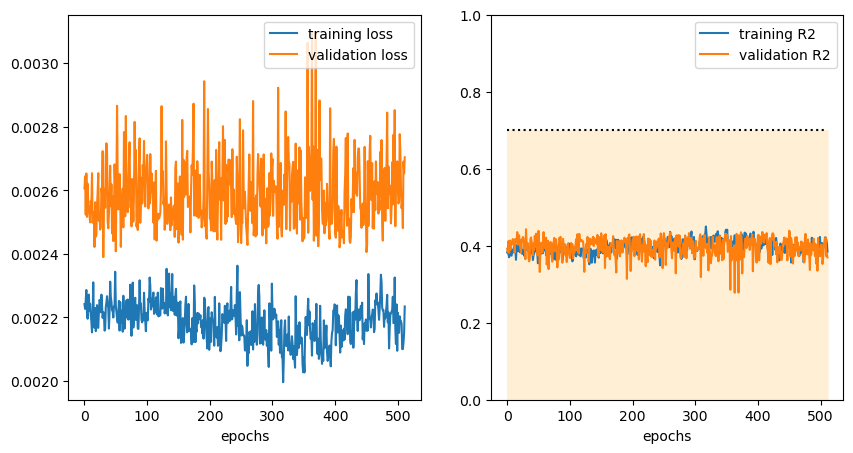

In [331]:
pcaNN.show_learning_plots(pcahist)

- evaluate

In [332]:
pcaNN.evaluate(pcax_test_transformed_scaled, pcay_test/10000, pcaNNmodel)

22/22 - 0s - loss: 0.0027 - r_square: 0.3697 - 33ms/epoch - 2ms/step


- predicting

In [127]:
df_pca.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3379 entries, 0 to 3446
Data columns (total 17 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Stahlbetonstütze         3379 non-null   int64  
 1   Stahlbetonverbundstütze  3379 non-null   int64  
 2   rund                     3379 non-null   int64  
 3   eckig                    3379 non-null   int64  
 4   oval                     3379 non-null   int64  
 5   d                        3379 non-null   float64
 6   a                        3379 non-null   float64
 7   b                        3379 non-null   float64
 8   l                        3379 non-null   float64
 9   Nd                       3379 non-null   int64  
 10  Md                       3379 non-null   float64
 11  Stück                    3379 non-null   int64  
 12  LoMa                     3379 non-null   float64
 13  Transport                3379 non-null   float64
 14  A                       

In [333]:
Stahlbetonstütze = 1
Stahlbetonverbundstütze = 0  
rund = 0
eckig = 1
oval = 0
d = 0
a = 0.25
b = 0.25
l = 3.0
Nd = 2000
Md = 0
Stück = 1
# LoMa = 1
# Transport = 10
A = a * b
V = A * l
N_mm2 = Nd*1000/(A*100*100*100)


In [334]:
xpre = np.array([[Stahlbetonstütze, Stahlbetonverbundstütze, rund, eckig, oval, d, a, b, l, Nd, Md, Stück,
                 A, V, N_mm2]])

xpre_transformed = pca.transform(xpre)

pre = s.transform(xpre_transformed)

ypre = pcaNN.predict(pcaNNmodel, pre)


"""
print(xpre)
print(xpre_transformed)
print(pre)
"""

print(f"{ypre[0][0]*10000:0.0f}")

1/1 [==============================] - 0s 61ms/step
532


In [348]:
import tensorflow as tf
import tensorflow_addons as tfa

class NeuralNetwork:
    """
    Provide all the necessary moduls to work with the neural network
    """

    def creat_network(self, input_shape: int) -> tf.keras.models.Sequential:
        """
        Create the neural network model and define the training
        (loss function, metrics)

        :param input_shape: Number of input variables
        :return: neural network object
        """

        # create the model
        model = tf.keras.models.Sequential([
            tf.keras.layers.Flatten(input_shape=(input_shape,)),  # input shape
            # 1. layer: number of neurons, activations function relu
            tf.keras.layers.Dense(128, activation='relu'),
            # 2. layer
            tf.keras.layers.Dense(64, activation='relu'),
            tf.keras.layers.Dense(64, activation='relu'),
            tf.keras.layers.Dense(32, activation='relu'),
            tf.keras.layers.Dense(64, activation='sigmoid'),
            tf.keras.layers.Dense(64, activation='sigmoid'),
            tf.keras.layers.Dense(32, activation='sigmoid'),
            # last layer has 1 neuron and no activation function as we're
            # looking for a number value
            tf.keras.layers.Dense(1, activation=None)])

        # Train the model
        # how we are going to train
        # learning_rate: steps the model maks when it's learning?
        model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.01),
                      loss='mse',  # what loss function to use
                      metrics=[tfa.metrics.r_square.RSquare()])  # what metrics we want tu use
        # model.summary()
        return model

    def fit_model(self, model,
                  x_train: pd.DataFrame, y_train: pd.DataFrame,
                  x_test: pd.DataFrame, y_test: pd.DataFrame,
                  epoch: int = 256):
        save_path = 'save/col_{epoch}.ckpt'
        save_callback = tf.keras.callbacks.ModelCheckpoint(filepath=save_path,
                                                           save_weights_only=True)

        hist = model.fit(x=x_train, y=y_train,  # training data
                         # batchsize 75 epoch with 128 samples
                         epochs=epoch, batch_size=32,
                         validation_data=(x_test, y_test),  # validation
                         callbacks=[
                             save_callback])  # save values wights and bias?

        return hist

    def show_learning_plots(self, hist):
        fig, axs = plt.subplots(1, 2, figsize=(10, 5))
        axs[0].plot(hist.epoch, hist.history['loss'])
        axs[0].plot(hist.epoch, hist.history['val_loss'])
        axs[0].legend(('training loss', 'validation loss'), loc='upper right')
        axs[0].set_xlabel("epochs")

        axs[1].plot(hist.epoch, hist.history['r_square'])
        axs[1].plot(hist.epoch, hist.history['val_r_square'])
        axs[1].legend(('training R2', 'validation R2'))  # , loc='upper left')
        axs[1].hlines(y=0.7, xmin=hist.epoch[0], xmax=hist.epoch[-1],  color="black", linestyles="dotted")
        axs[1].fill_between(x=hist.epoch, y1=0, y2=0.7, color="papayawhip")
        axs[1].set_ylim([0, 1])
        axs[1].set_xlabel("epochs")
        plt.show()

    def evaluate(self, x, y, model):
        model.evaluate(x, y, verbose=2)

    def predict(self, model, x):
        return model.predict(x)


In [349]:
pcaNN_ = NeuralNetwork()
pcaNNmodel_ = pcaNN_.creat_network(2)

In [350]:
pcahist_ = pcaNN_.fit_model(pcaNNmodel_, 
                          pcax_train_transformed_scaled, 
                          pcay_train/10000, 
                          pcax_test_transformed_scaled, 
                          pcay_test/10000, 
                          epoch=512)

Epoch 1/512
85/85 [==============================] - 1s 3ms/step - loss: 0.0498 - r_square: -12.7211 - val_loss: 0.0042 - val_r_square: 0.0272
Epoch 2/512
85/85 [==============================] - 0s 2ms/step - loss: 0.0028 - r_square: 0.2384 - val_loss: 0.0032 - val_r_square: 0.2461
Epoch 3/512
85/85 [==============================] - 0s 2ms/step - loss: 0.0025 - r_square: 0.3045 - val_loss: 0.0029 - val_r_square: 0.3340
Epoch 4/512
85/85 [==============================] - 0s 2ms/step - loss: 0.0025 - r_square: 0.3113 - val_loss: 0.0034 - val_r_square: 0.2132
Epoch 5/512
85/85 [==============================] - 0s 2ms/step - loss: 0.0025 - r_square: 0.3084 - val_loss: 0.0030 - val_r_square: 0.2976
Epoch 6/512
85/85 [==============================] - 0s 2ms/step - loss: 0.0025 - r_square: 0.2990 - val_loss: 0.0028 - val_r_square: 0.3367
Epoch 7/512
85/85 [==============================] - 0s 2ms/step - loss: 0.0026 - r_square: 0.2752 - val_loss: 0.0030 - val_r_square: 0.3023
Epoch 8/512

Epoch 59/512
85/85 [==============================] - 0s 2ms/step - loss: 0.0025 - r_square: 0.3102 - val_loss: 0.0025 - val_r_square: 0.4171
Epoch 60/512
85/85 [==============================] - 0s 2ms/step - loss: 0.0024 - r_square: 0.3454 - val_loss: 0.0027 - val_r_square: 0.3776
Epoch 61/512
85/85 [==============================] - 0s 2ms/step - loss: 0.0026 - r_square: 0.2855 - val_loss: 0.0025 - val_r_square: 0.4134
Epoch 62/512
85/85 [==============================] - 0s 2ms/step - loss: 0.0024 - r_square: 0.3386 - val_loss: 0.0026 - val_r_square: 0.3999
Epoch 63/512
85/85 [==============================] - 0s 2ms/step - loss: 0.0025 - r_square: 0.3226 - val_loss: 0.0025 - val_r_square: 0.4082
Epoch 64/512
85/85 [==============================] - 0s 2ms/step - loss: 0.0024 - r_square: 0.3324 - val_loss: 0.0026 - val_r_square: 0.3957
Epoch 65/512
85/85 [==============================] - 0s 2ms/step - loss: 0.0025 - r_square: 0.2976 - val_loss: 0.0026 - val_r_square: 0.3920
Epoch 

85/85 [==============================] - 0s 2ms/step - loss: 0.0023 - r_square: 0.3655 - val_loss: 0.0027 - val_r_square: 0.3704
Epoch 117/512
85/85 [==============================] - 0s 2ms/step - loss: 0.0024 - r_square: 0.3496 - val_loss: 0.0026 - val_r_square: 0.3889
Epoch 118/512
85/85 [==============================] - 0s 2ms/step - loss: 0.0024 - r_square: 0.3411 - val_loss: 0.0029 - val_r_square: 0.3319
Epoch 119/512
85/85 [==============================] - 0s 2ms/step - loss: 0.0024 - r_square: 0.3483 - val_loss: 0.0029 - val_r_square: 0.3346
Epoch 120/512
85/85 [==============================] - 0s 2ms/step - loss: 0.0023 - r_square: 0.3619 - val_loss: 0.0026 - val_r_square: 0.4016
Epoch 121/512
85/85 [==============================] - 0s 2ms/step - loss: 0.0024 - r_square: 0.3519 - val_loss: 0.0029 - val_r_square: 0.3183
Epoch 122/512
85/85 [==============================] - 0s 2ms/step - loss: 0.0024 - r_square: 0.3406 - val_loss: 0.0025 - val_r_square: 0.4074
Epoch 123/512

85/85 [==============================] - 0s 2ms/step - loss: 0.0023 - r_square: 0.3724 - val_loss: 0.0025 - val_r_square: 0.4089
Epoch 174/512
85/85 [==============================] - 0s 2ms/step - loss: 0.0022 - r_square: 0.3870 - val_loss: 0.0025 - val_r_square: 0.4198
Epoch 175/512
85/85 [==============================] - 0s 2ms/step - loss: 0.0022 - r_square: 0.3958 - val_loss: 0.0027 - val_r_square: 0.3611
Epoch 176/512
85/85 [==============================] - 0s 2ms/step - loss: 0.0024 - r_square: 0.3463 - val_loss: 0.0034 - val_r_square: 0.2039
Epoch 177/512
85/85 [==============================] - 0s 2ms/step - loss: 0.0024 - r_square: 0.3524 - val_loss: 0.0032 - val_r_square: 0.2558
Epoch 178/512
85/85 [==============================] - 0s 2ms/step - loss: 0.0024 - r_square: 0.3489 - val_loss: 0.0026 - val_r_square: 0.4000
Epoch 179/512
85/85 [==============================] - 0s 2ms/step - loss: 0.0024 - r_square: 0.3317 - val_loss: 0.0029 - val_r_square: 0.3334
Epoch 180/512

85/85 [==============================] - 0s 2ms/step - loss: 0.0022 - r_square: 0.3985 - val_loss: 0.0025 - val_r_square: 0.4159
Epoch 231/512
85/85 [==============================] - 0s 2ms/step - loss: 0.0023 - r_square: 0.3777 - val_loss: 0.0028 - val_r_square: 0.3493
Epoch 232/512
85/85 [==============================] - 0s 2ms/step - loss: 0.0023 - r_square: 0.3663 - val_loss: 0.0034 - val_r_square: 0.1980
Epoch 233/512
85/85 [==============================] - 0s 2ms/step - loss: 0.0024 - r_square: 0.3379 - val_loss: 0.0025 - val_r_square: 0.4075
Epoch 234/512
85/85 [==============================] - 0s 2ms/step - loss: 0.0023 - r_square: 0.3704 - val_loss: 0.0030 - val_r_square: 0.3039
Epoch 235/512
85/85 [==============================] - 0s 2ms/step - loss: 0.0024 - r_square: 0.3518 - val_loss: 0.0026 - val_r_square: 0.4053
Epoch 236/512
85/85 [==============================] - 0s 2ms/step - loss: 0.0023 - r_square: 0.3609 - val_loss: 0.0026 - val_r_square: 0.4008
Epoch 237/512

85/85 [==============================] - 0s 2ms/step - loss: 0.0025 - r_square: 0.3243 - val_loss: 0.0026 - val_r_square: 0.3897
Epoch 288/512
85/85 [==============================] - 0s 2ms/step - loss: 0.0022 - r_square: 0.3873 - val_loss: 0.0025 - val_r_square: 0.4116
Epoch 289/512
85/85 [==============================] - 0s 2ms/step - loss: 0.0022 - r_square: 0.3834 - val_loss: 0.0026 - val_r_square: 0.3823
Epoch 290/512
85/85 [==============================] - 0s 2ms/step - loss: 0.0022 - r_square: 0.3945 - val_loss: 0.0027 - val_r_square: 0.3795
Epoch 291/512
85/85 [==============================] - 0s 2ms/step - loss: 0.0023 - r_square: 0.3545 - val_loss: 0.0026 - val_r_square: 0.3976
Epoch 292/512
85/85 [==============================] - 0s 2ms/step - loss: 0.0023 - r_square: 0.3795 - val_loss: 0.0025 - val_r_square: 0.4222
Epoch 293/512
85/85 [==============================] - 0s 2ms/step - loss: 0.0023 - r_square: 0.3690 - val_loss: 0.0024 - val_r_square: 0.4468
Epoch 294/512

85/85 [==============================] - 0s 2ms/step - loss: 0.0022 - r_square: 0.3944 - val_loss: 0.0025 - val_r_square: 0.4060
Epoch 345/512
85/85 [==============================] - 0s 2ms/step - loss: 0.0022 - r_square: 0.3917 - val_loss: 0.0028 - val_r_square: 0.3443
Epoch 346/512
85/85 [==============================] - 0s 2ms/step - loss: 0.0022 - r_square: 0.3991 - val_loss: 0.0026 - val_r_square: 0.3993
Epoch 347/512
85/85 [==============================] - 0s 2ms/step - loss: 0.0024 - r_square: 0.3496 - val_loss: 0.0028 - val_r_square: 0.3516
Epoch 348/512
85/85 [==============================] - 0s 2ms/step - loss: 0.0023 - r_square: 0.3572 - val_loss: 0.0030 - val_r_square: 0.2986
Epoch 349/512
85/85 [==============================] - 0s 2ms/step - loss: 0.0023 - r_square: 0.3611 - val_loss: 0.0028 - val_r_square: 0.3526
Epoch 350/512
85/85 [==============================] - 0s 2ms/step - loss: 0.0025 - r_square: 0.3181 - val_loss: 0.0026 - val_r_square: 0.3923
Epoch 351/512

85/85 [==============================] - 0s 2ms/step - loss: 0.0022 - r_square: 0.3843 - val_loss: 0.0030 - val_r_square: 0.3037
Epoch 402/512
85/85 [==============================] - 0s 2ms/step - loss: 0.0023 - r_square: 0.3545 - val_loss: 0.0028 - val_r_square: 0.3422
Epoch 403/512
85/85 [==============================] - 0s 2ms/step - loss: 0.0022 - r_square: 0.4010 - val_loss: 0.0029 - val_r_square: 0.3151
Epoch 404/512
85/85 [==============================] - 0s 2ms/step - loss: 0.0023 - r_square: 0.3646 - val_loss: 0.0028 - val_r_square: 0.3465
Epoch 405/512
85/85 [==============================] - 0s 2ms/step - loss: 0.0023 - r_square: 0.3728 - val_loss: 0.0026 - val_r_square: 0.3961
Epoch 406/512
85/85 [==============================] - 0s 2ms/step - loss: 0.0022 - r_square: 0.3931 - val_loss: 0.0025 - val_r_square: 0.4165
Epoch 407/512
85/85 [==============================] - 0s 2ms/step - loss: 0.0023 - r_square: 0.3753 - val_loss: 0.0027 - val_r_square: 0.3775
Epoch 408/512

85/85 [==============================] - 0s 2ms/step - loss: 0.0021 - r_square: 0.4287 - val_loss: 0.0026 - val_r_square: 0.3849
Epoch 459/512
85/85 [==============================] - 0s 2ms/step - loss: 0.0023 - r_square: 0.3655 - val_loss: 0.0030 - val_r_square: 0.2943
Epoch 460/512
85/85 [==============================] - 0s 2ms/step - loss: 0.0024 - r_square: 0.3519 - val_loss: 0.0027 - val_r_square: 0.3798
Epoch 461/512
85/85 [==============================] - 0s 2ms/step - loss: 0.0022 - r_square: 0.3836 - val_loss: 0.0029 - val_r_square: 0.3261
Epoch 462/512
85/85 [==============================] - 0s 2ms/step - loss: 0.0024 - r_square: 0.3288 - val_loss: 0.0025 - val_r_square: 0.4175
Epoch 463/512
85/85 [==============================] - 0s 2ms/step - loss: 0.0022 - r_square: 0.4042 - val_loss: 0.0024 - val_r_square: 0.4319
Epoch 464/512
85/85 [==============================] - 0s 2ms/step - loss: 0.0022 - r_square: 0.3969 - val_loss: 0.0025 - val_r_square: 0.4157
Epoch 465/512

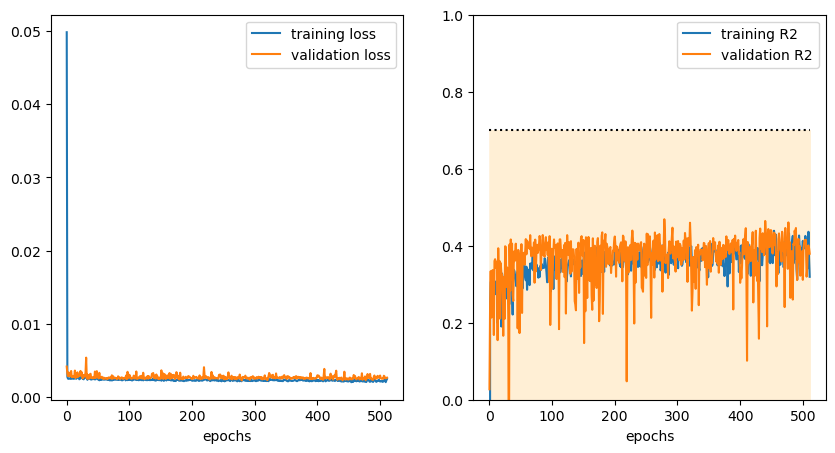

In [351]:
pcaNN_.show_learning_plots(pcahist_)

In [352]:
pcaNN_.evaluate(pcax_test_transformed_scaled, pcay_test/10000, pcaNNmodel_)

22/22 - 0s - loss: 0.0027 - r_square: 0.3792 - 36ms/epoch - 2ms/step
